# Data Science Salary Report

## Introduction

Throughout the past few years, data science jobs have become more in demand than ever, with the U.S. Bureau of Labor Statistics predicting data science to see more growth than almost any other field between now and 2029 (Davenport, 2022). Data science is a varied field, with a wide range of work that involves performing robust analytics (Anderson, 2018). Although data science is growing, the characteristics that influence data science salaries are still not well understood (Agoeng et al., 2024). This makes it difficult for companies to determine adequate compensation in the hiring process and for employees to understand how they can better position themselves for higher pay (Agoeng et al., 2024). In this report, we will explore a data science salary dataset to answer the inferential question: 

**What characteristics of a data science job and/or data science employee are associated with a data scientist's salary in USD?** 

The dataset "Data Science Job Salaries" found on Kaggle provides valuable insights into professions in data science. It contains a collection of salary records for data science professionals, along with job related data, across various countries from 2020 to 2022. It was created using salary data obtained from another website, ai-jobs.net, which collected and aggregated the data through survey submissions and jobs that have open salaries. There are 607 observations and 12 columns in the dataset, with 11 variables total (one column contains row numbers):


**Categorical variables:**

- `work_year`: The year in which the salary was paid.
- `experience_level`: The experience level in the job. Contains:
    - Entry-level/Junior (EN)
    - Mid-level/Intermediate (MI)
    - Senior-level/Expert (SE)
    - Executive-level/Senior (EX).
- `employment_type`: The type of employment for the role. Contains:
    - Part-time (PT)
    - Full-time (FT)
    - Contract (CT)
    - Freelance (FL).
- `job_title`: Role of the employee.
- `employee_residence`: The employee's primary country of residence, expressed using ISO 3166 country codes.
- `remote_ratio`: The overall ratio of work done remotely. Contains:
    - No remote work or less than 20% (0)
    - Partially remote (50)
    - Fully remote or more than 80% (100).
- `company_location`: The country where the employer's main office/contracting branch is located, expressed using ISO 3166 country codes.
- `company_size`: The average number of people working for the company. Contains:
    - less than 50 employees (S)
    - 50 to 250 employees (M)
    - more than 250 employees (L)
- `salary_currency`: The currency of the salary, expressed using ISO 4217 currency codes.

**Continuous variables:**

- `salary`: The total gross salary paid to the employee.
- `salary_in_usd`: Salary converted to USD using the average exchange rate of the work year.

## Methods and Results

## Exploratory Data Analysis

In [1]:
#Download necessary packages and format graphs.
install.packages("countrycode")
install.packages("StepReg")

#Loading necessary packages.
library(tidyverse)
library(tidymodels)
library(gridExtra)
library(StepReg)
library(mltools)
library(GGally)
library(scales)
library(countrycode)
library(car)
library(lmtest)

options(repr.plot.width = 14, repr.plot.height = 10)


The downloaded binary packages are in
	/var/folders/5j/m6szk0mj5b95k_kbw53pml000000gn/T//RtmpzC7BUV/downloaded_packages

The downloaded binary packages are in
	/var/folders/5j/m6szk0mj5b95k_kbw53pml000000gn/T//RtmpzC7BUV/downloaded_packages


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
-- Attaching packages -------------------------------------- tidymodels 1.2.0 --

v broom        1.0.6      v rsample      1.2.1 
v dials        1.2.1      v tune         1.2.1 
v infer        1.0.7      v workflows    1.1.4 
v modeldata    1.4.0      v workflowsets 1.1.0 
v parsnip      1.2.1      v yardstick    1.3.1 
v recipes      1.0.10     

-- Conflicts ----------------------------------------- tidymodels_conflicts() --
x scales::discard() masks purrr::discard()
x 

In [2]:
# Main developer: Stevan
#Set seed for reproducibility.
set.seed(10)

### Loading, Spliting. and Checking the Data

We will first load the data and split the dataset into a selection set and training set. We will set the training set aside and look at the selection set.

In [3]:
# Main developer: Eric
#Read data into R. Dataset was uploaded to a GitHub repo to allow it to be read from a URL.
ds_salaries <- read_csv("https://raw.githubusercontent.com/1zhoueri/stat-301-project/main/ds_salaries.csv")

New names:
* `` -> `...1`
Rows: 607 Columns: 12
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (7): experience_level, employment_type, job_title, salary_currency, empl...
dbl (5): ...1, work_year, salary, salary_in_usd, remote_ratio

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
# Main developer: Stevan
# Contributor: Eric (modified split)
#Split the data into selection and training sets.
ds_salaries_sel <- 
    ds_salaries |> 
    slice_sample(prop = 0.4)

ds_salaries_train <- 
    ds_salaries |> 
    anti_join(ds_salaries_sel, by = "...1")

In [5]:
# Main developer: Eric
#Check the packaging.
str(ds_salaries_sel)

spc_tbl_ [242 x 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1              : num [1:242] 490 329 367 459 438 583 437 422 510 343 ...
 $ work_year         : num [1:242] 2022 2022 2022 2022 2022 ...
 $ experience_level  : chr [1:242] "SE" "MI" "MI" "MI" ...
 $ employment_type   : chr [1:242] "FT" "FT" "FT" "FT" ...
 $ job_title         : chr [1:242] "Head of Data" "Data Analyst" "Data Analyst" "Data Scientist" ...
 $ salary            : num [1:242] 200000 115500 58000 2400000 189650 ...
 $ salary_currency   : chr [1:242] "USD" "USD" "USD" "INR" ...
 $ salary_in_usd     : num [1:242] 200000 115500 58000 31615 189650 ...
 $ employee_residence: chr [1:242] "MY" "US" "US" "IN" ...
 $ remote_ratio      : num [1:242] 100 100 0 100 0 100 100 100 100 100 ...
 $ company_location  : chr [1:242] "US" "US" "US" "IN" ...
 $ company_size      : chr [1:242] "M" "M" "S" "L" ...
 - attr(*, "spec")=
  .. cols(
  ..   ...1 = col_double(),
  ..   work_year = col_double(),
  ..   experience_level = col

#### Table 1 and 2: Data Scientist Job Salaries Selection Dataset

In [6]:
# Main developer: Eric
#Show the top and bottom of the data.
head(ds_salaries_sel)
tail(ds_salaries_sel)

...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
490,2022,SE,FT,Head of Data,200000,USD,200000,MY,100,US,M
329,2022,MI,FT,Data Analyst,115500,USD,115500,US,100,US,M
367,2022,MI,FT,Data Analyst,58000,USD,58000,US,0,US,S
459,2022,MI,FT,Data Scientist,2400000,INR,31615,IN,100,IN,L
438,2022,SE,FT,Machine Learning Engineer,189650,USD,189650,US,0,US,M
583,2022,SE,FT,Data Engineer,160080,USD,160080,US,100,US,M


...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
35,2020,MI,FT,Data Engineer,65000,EUR,74130,AT,50,AT,L
213,2021,EN,FT,Big Data Engineer,435000,INR,5882,IN,0,CH,L
114,2021,MI,FT,Data Engineer,38400,EUR,45391,NL,100,NL,L
421,2022,MI,FT,Data Science Manager,241000,USD,241000,US,100,US,M
506,2022,MI,FT,Applied Machine Learning Scientist,75000,USD,75000,BO,100,US,L
486,2022,SE,FT,Data Scientist,230000,USD,230000,US,100,US,M


In [7]:
# Main developers: Eric and Anna
#View summary statistics.
summary(ds_salaries_sel)

      ...1         work_year    experience_level   employment_type   
 Min.   :  3.0   Min.   :2020   Length:242         Length:242        
 1st Qu.:151.2   1st Qu.:2021   Class :character   Class :character  
 Median :318.5   Median :2022   Mode  :character   Mode  :character  
 Mean   :307.6   Mean   :2021                                        
 3rd Qu.:464.5   3rd Qu.:2022                                        
 Max.   :605.0   Max.   :2022                                        
  job_title             salary         salary_currency    salary_in_usd   
 Length:242         Min.   :   10000   Length:242         Min.   :  2859  
 Class :character   1st Qu.:   69999   Class :character   1st Qu.: 60000  
 Mode  :character   Median :  114000   Mode  :character   Median :100000  
                    Mean   :  389627                      Mean   :110828  
                    3rd Qu.:  161026                      3rd Qu.:150000  
                    Max.   :30400000                      Ma

Some changes need to be made to the dataset. The first column is unnecessary and will be removed as it only contains row numbers, and the character columns should be factors in order to use them as categorical variables. Since we have decided to perform inference on `salary_in_usd`, we will drop `salary` and `salary_currency` as they will be unused and are too highly correlated with the response variable.

### Cleaning and Tidying Data

In [8]:
# Main developer: Stevan
#Remove row numbers.
ds_salaries_train <- ds_salaries_train[, -1]
ds_salaries_sel <- ds_salaries_sel[, -1]

In [9]:
# Main developer: Eric
#Turn catagorical variables into factors for both datasets.
tidy_ds_salaries_sel <- ds_salaries_sel |>
    mutate(across(-c(salary, salary_in_usd), as.factor))

tidy_ds_salaries_train <- ds_salaries_train |>
    mutate(across(-c(salary, salary_in_usd), as.factor))

In [10]:
# Main developer: Stevan
#Remove unused variables from both datasets.
tidy_ds_salaries_sel <- tidy_ds_salaries_sel |>
    select(-salary, -salary_currency)

tidy_ds_salaries_train <- tidy_ds_salaries_train |>
    select(-salary, -salary_currency)

In [11]:
# Main developers: Eric
#View summary statistics. 
summary(tidy_ds_salaries_sel)

 work_year  experience_level employment_type                     job_title 
 2020: 32   EN: 39           CT:  2          Data Scientist           :60  
 2021: 79   EX:  7           FL:  1          Data Engineer            :48  
 2022:131   MI: 87           FT:234          Data Analyst             :43  
            SE:109           PT:  5          Machine Learning Engineer:14  
                                             Data Science Manager     : 8  
                                             Research Scientist       : 7  
                                             (Other)                  :62  
 salary_in_usd    employee_residence remote_ratio company_location company_size
 Min.   :  2859   US     :134        0  : 57      US     :143      L: 80       
 1st Qu.: 60000   IN     : 15        50 : 35      GB     : 15      M:129       
 Median :100000   CA     : 13        100:150      CA     : 14      S: 33       
 Mean   :110828   GB     : 13                     IN     : 12           

#### Table 3: Unique Counts for Each Variable

In [12]:
# Main developers: Eric and Anna
# View the number of unique values in the selection dataset.

tibble(variables = colnames(tidy_ds_salaries_sel), unique_counts = sapply(tidy_ds_salaries_sel, function(x) n_distinct(x)))

variables,unique_counts
<chr>,<int>
work_year,3
experience_level,4
employment_type,4
job_title,35
salary_in_usd,181
employee_residence,40
remote_ratio,3
company_location,34
company_size,3


Based on the outputs above, there are a large number of groups for the variables `employee_residence`, `company_location`, and `job_title`, with the majority of the groups having too few data points to provide for a significant analysis. To prevent the model from having too many dummy variables, we will simplify them by merging the different countries in `employee_residence` and `company_location` into 7 regions (defined in the World Bank Development Indicators) and by merging the jobs in `job_title` into 3 groups: Data Scientist, Data Analyst, and Data Engineer. 
- Data Scientist: jobs that mention scientist, researcher, consultant, or heads of data science departments (excluding ones that mention engineer).
- Data Analyst: jobs that mention analytics and analyst (excluding ones that mention engineer).
- Data Engineer: jobs that mention engineer, engineering, architect, and developer.

In [13]:
# Main developer: Eric
#Merge countries in `employee_residence` and `company_location` into 7 regions for both datasets.
tidy_ds_salaries_sel$company_location <- as.factor(countrycode(tidy_ds_salaries_sel$company_location, "iso2c", "region"))
tidy_ds_salaries_sel$employee_residence <- as.factor(countrycode(tidy_ds_salaries_sel$employee_residence, "iso2c", "region"))

tidy_ds_salaries_train$company_location <- as.factor(countrycode(tidy_ds_salaries_train$company_location, "iso2c", "region"))
tidy_ds_salaries_train$employee_residence <- as.factor(countrycode(tidy_ds_salaries_train$employee_residence, "iso2c", "region"))

In [14]:
# Main developer: Eric
# Contributor: Stevan (complete rewrite)
#Rename each job in `job_title` for both datasets.
data_scientist_job_titles <- c(
    "Data Scientist", "3D Computer Vision Researcher", "Machine Learning Scientist",
    "AI Scientist", "Applied Data Scientist", "Applied Machine Learning Scientist",
    "Data Science Consultant", "Data Science Manager", "Data Specialist",
    "Director of Data Science", "Head of Data", "Head of Data Science",
    "Head of Machine Learning", "Lead Data Scientist", "Machine Learning Manager",
    "Principal Data Scientist", "Research Scientist", "Staff Data Scientist"
)
data_analyst_job_titles <- c(
    "BI Data Analyst", "Business Data Analyst", "Data Analyst",
    "Data Analytics Lead", "Data Analytics Manager", "Finance Data Analyst",
    "Financial Data Analyst", "Lead Data Analyst", "Marketing Data Analyst",
    "Product Data Analyst", "Principal Data Analyst"
)
data_engineer_job_titles <- c(
    "Analytics Engineer", "Data Engineer", "Big Data Architect",
    "Data Engineer", "Big Data Engineer", "Data Engineer",
    "Cloud Data Engineer", "Data Engineer", "Computer Vision Engineer",
    "Data Engineer", "Computer Vision Software Engineer",
    "Data Engineer", "Data Analytics Engineer", "Data Engineer",
    "Data Architect", "Data Engineer", "Data Engineering Manager",
    "Data Science Engineer", "Director of Data Engineering", "ETL Developer",
    "Lead Data Engineer", "Lead Machine Learning Engineer", "Machine Learning Developer",
    "Machine Learning Engineer", "Machine Learning Infrastructure Engineer", "ML Engineer",
    "NLP Engineer", "Principal Data Engineer"
)

tidy_ds_salaries_sel$job_title <- factor(
    tidy_ds_salaries_sel$job_title,
    levels = c(data_scientist_job_titles, data_analyst_job_titles, data_engineer_job_titles),
    labels = c(rep("Data Scientist", length(data_scientist_job_titles)),
               rep("Data Analyst", length(data_analyst_job_titles)), 
               rep("Data Engineer", length(data_engineer_job_titles)))
)

tidy_ds_salaries_train$job_title <- factor(
    tidy_ds_salaries_train$job_title,
    levels = c(data_scientist_job_titles, data_analyst_job_titles, data_engineer_job_titles),
    labels = c(rep("Data Scientist", length(data_scientist_job_titles)),
               rep("Data Analyst", length(data_analyst_job_titles)), 
               rep("Data Engineer", length(data_engineer_job_titles)))
)

#Resets the factors in `job_title` to only include the three categories for both datasets.
tidy_ds_salaries_sel <- mutate(tidy_ds_salaries_sel, job_title = as.character(job_title)) |>
    mutate(job_title = as.factor(job_title))

tidy_ds_salaries_train <- mutate(tidy_ds_salaries_train, job_title = as.character(job_title)) |>
    mutate(job_title = as.factor(job_title))

#### Table 4: Tidy Data Scientist Job Salaries Selection Dataset

In [15]:
# Main developer: Eric
#Display the tidied dataset.
head(tidy_ds_salaries_sel)

work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
2022,SE,FT,Data Scientist,200000,East Asia & Pacific,100,North America,M
2022,MI,FT,Data Analyst,115500,North America,100,North America,M
2022,MI,FT,Data Analyst,58000,North America,0,North America,S
2022,MI,FT,Data Scientist,31615,South Asia,100,South Asia,L
2022,SE,FT,Data Engineer,189650,North America,0,North America,M
2022,SE,FT,Data Engineer,160080,North America,100,North America,M


### Data Visualization

The visualizations we will use to explore the data will be boxplots. This allows us to have an initial look at how the `salary_in_USD` might differ between groups and allows us to identify variables that seem to be associated with `salaries_in_USD` before building a model for the data. 

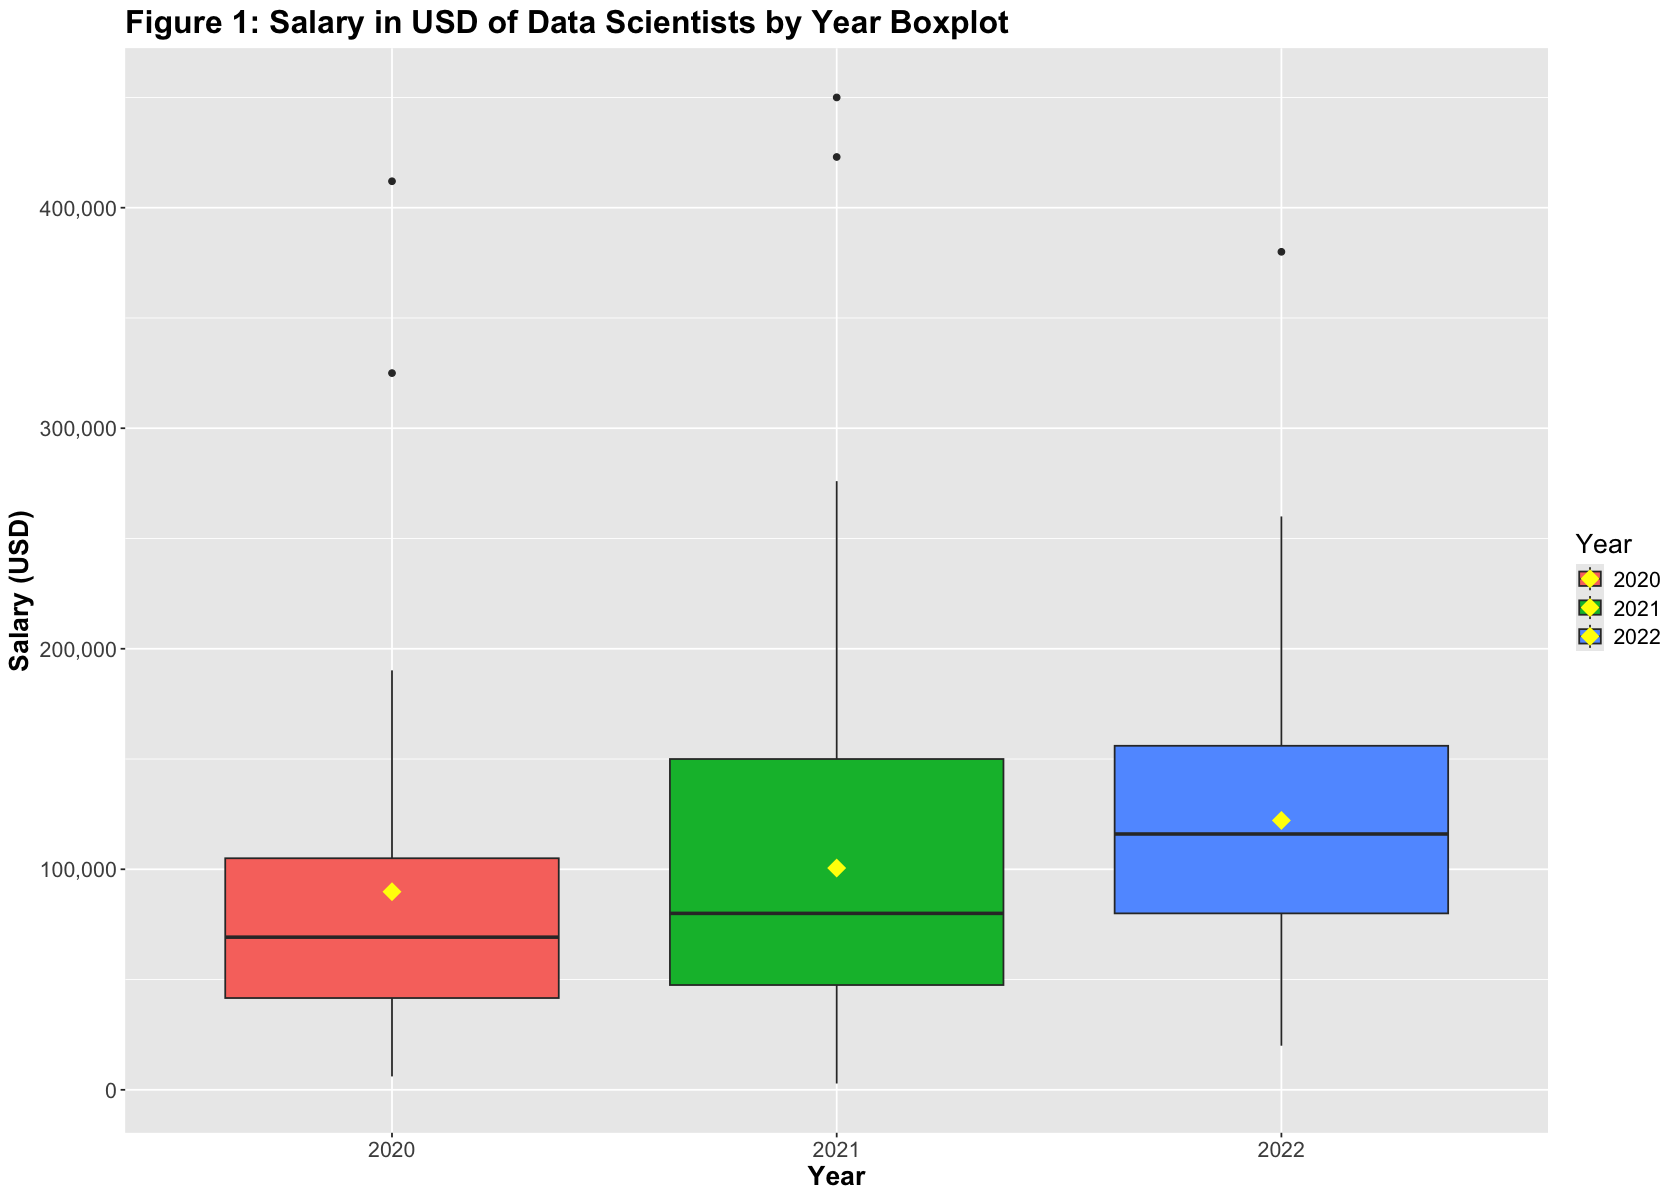

In [16]:
# Main developer: Eric
#Boxplot for salary in USD and year. A point is added indicating the mean.
salary_in_usd_work_year_boxplots <- tidy_ds_salaries_sel |>
    ggplot() +
    geom_boxplot(aes(x = work_year, y = salary_in_usd, fill = work_year)) +
    labs(x = "Year",
         y = "Salary (USD)",
         title = "Figure 1: Salary in USD of Data Scientists by Year Boxplot",
         fill = "Year") +
    stat_summary(aes(x = work_year, y = salary_in_usd, fill = work_year),
        fun = "mean", 
        colour = "yellow", 
        geom = "point", 
        shape = 18, 
        size = 5) +
    scale_y_continuous(labels = label_comma()) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_usd_work_year_boxplots

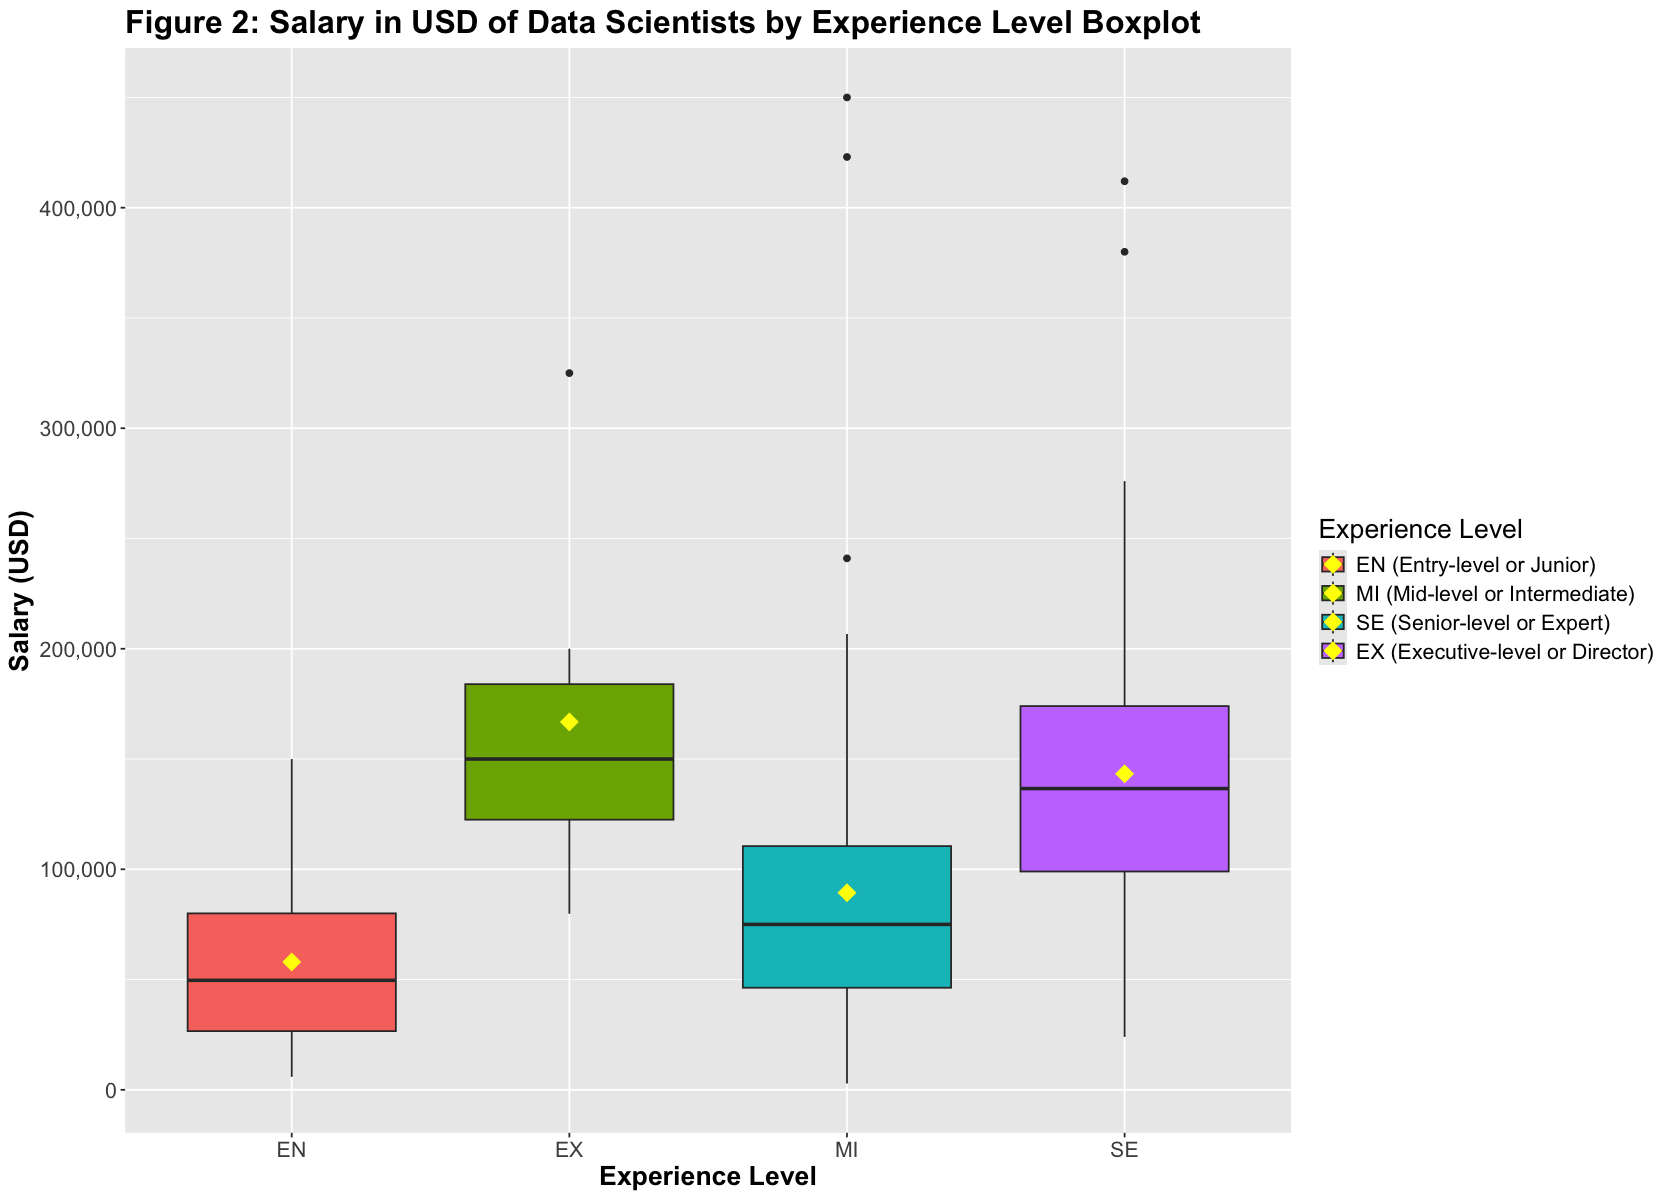

In [17]:
# Main developer: Eric
#Boxplot for salary in USD and experience level. A point is added indicating the mean.
salary_in_usd_experience_level_boxplots <- tidy_ds_salaries_sel |>
    ggplot() +
    geom_boxplot(aes(x = experience_level, y = salary_in_usd, fill = experience_level)) +
    labs(x = "Experience Level",
         y = "Salary (USD)",
         title = "Figure 2: Salary in USD of Data Scientists by Experience Level Boxplot",
         fill = "Experience Level") +
    stat_summary(aes(x = experience_level, y = salary_in_usd, fill = experience_level),
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_y_continuous(labels = label_comma()) +
    scale_fill_hue(labels = c("EN (Entry-level or Junior)",
                              "MI (Mid-level or Intermediate)",
                              "SE (Senior-level or Expert)",
                              "EX (Executive-level or Director)")) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_usd_experience_level_boxplots

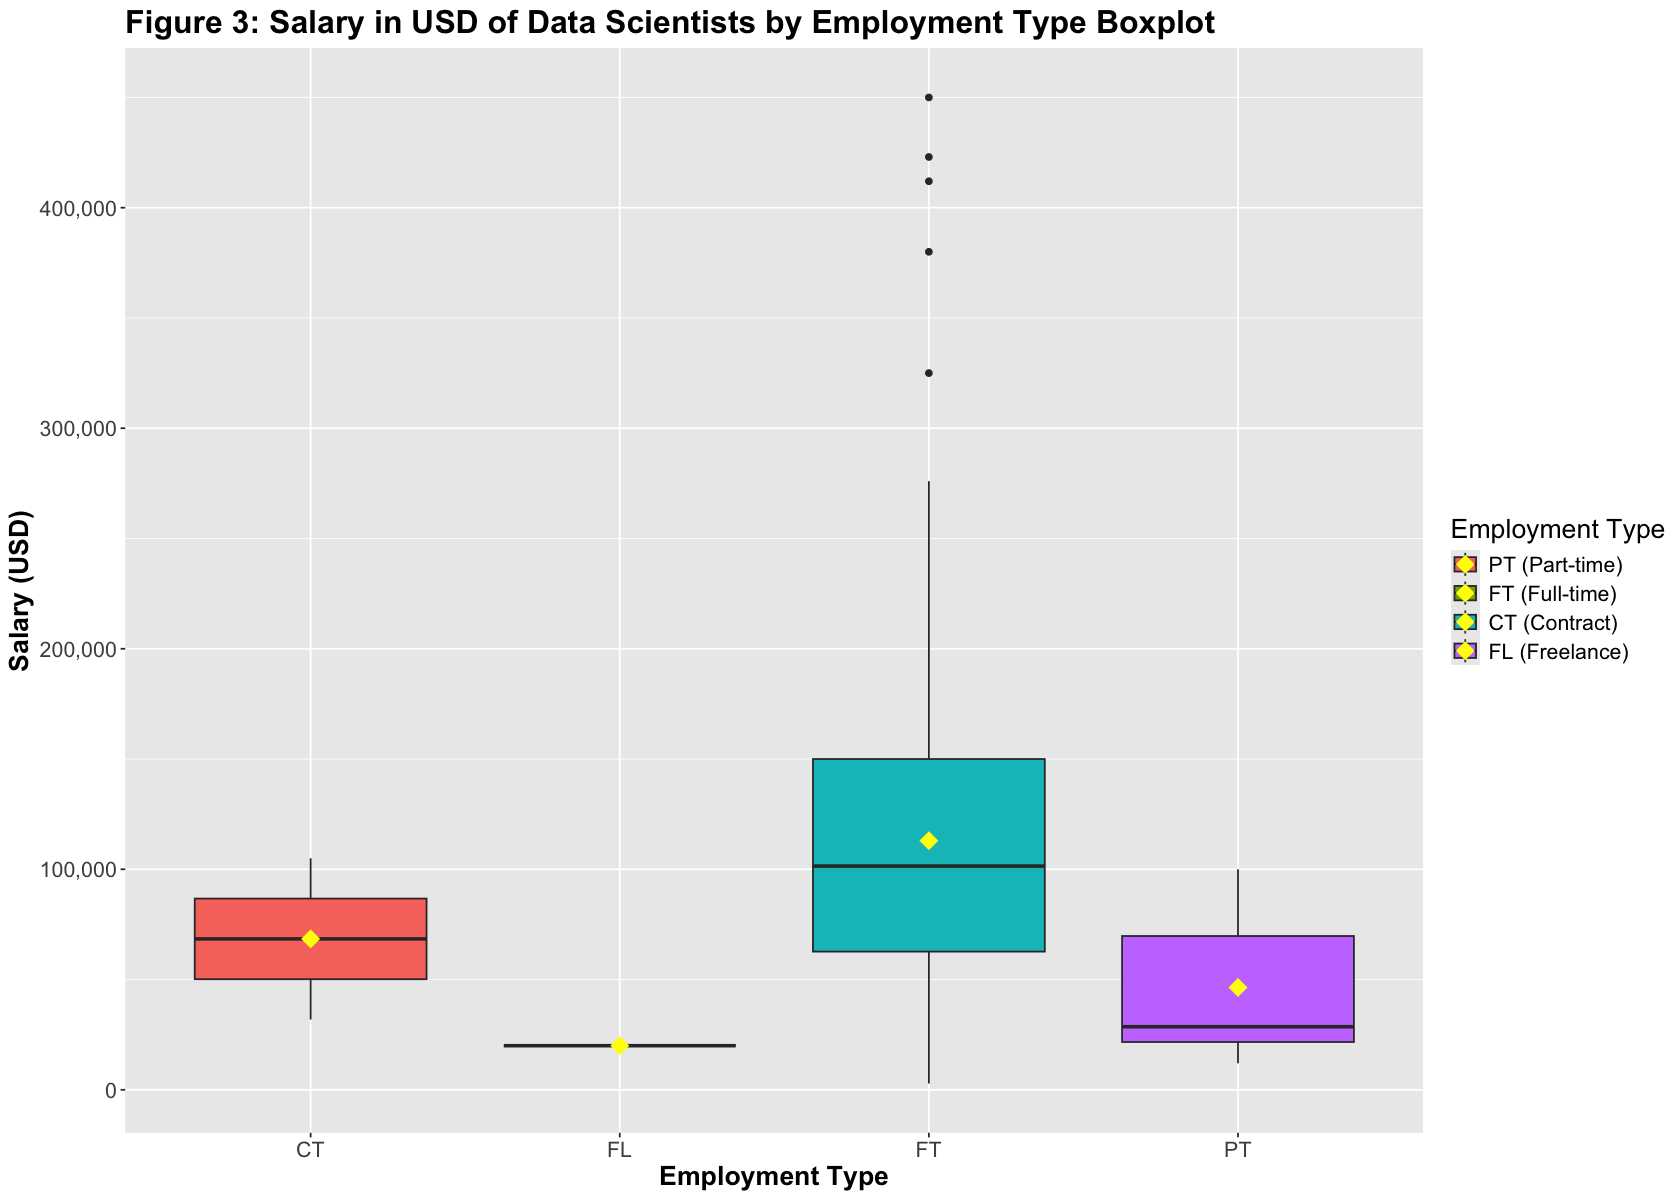

In [18]:
# Main developer: Eric
#Boxplot for salary in USD and employment type. A point is added indicating the mean.
salary_in_usd_employment_type_boxplots <- tidy_ds_salaries_sel |>
    ggplot() +
    geom_boxplot(aes(x = employment_type, y = salary_in_usd, fill = employment_type)) +
    labs(x = "Employment Type",
         y = "Salary (USD)",
         title = "Figure 3: Salary in USD of Data Scientists by Employment Type Boxplot",
         fill = "Employment Type") +
    stat_summary(aes(x = employment_type, y = salary_in_usd, fill = employment_type),
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_y_continuous(labels = label_comma()) +
    scale_fill_hue(labels = c("PT (Part-time)",
                              "FT (Full-time)",
                              "CT (Contract)",
                              "FL (Freelance)")) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_usd_employment_type_boxplots

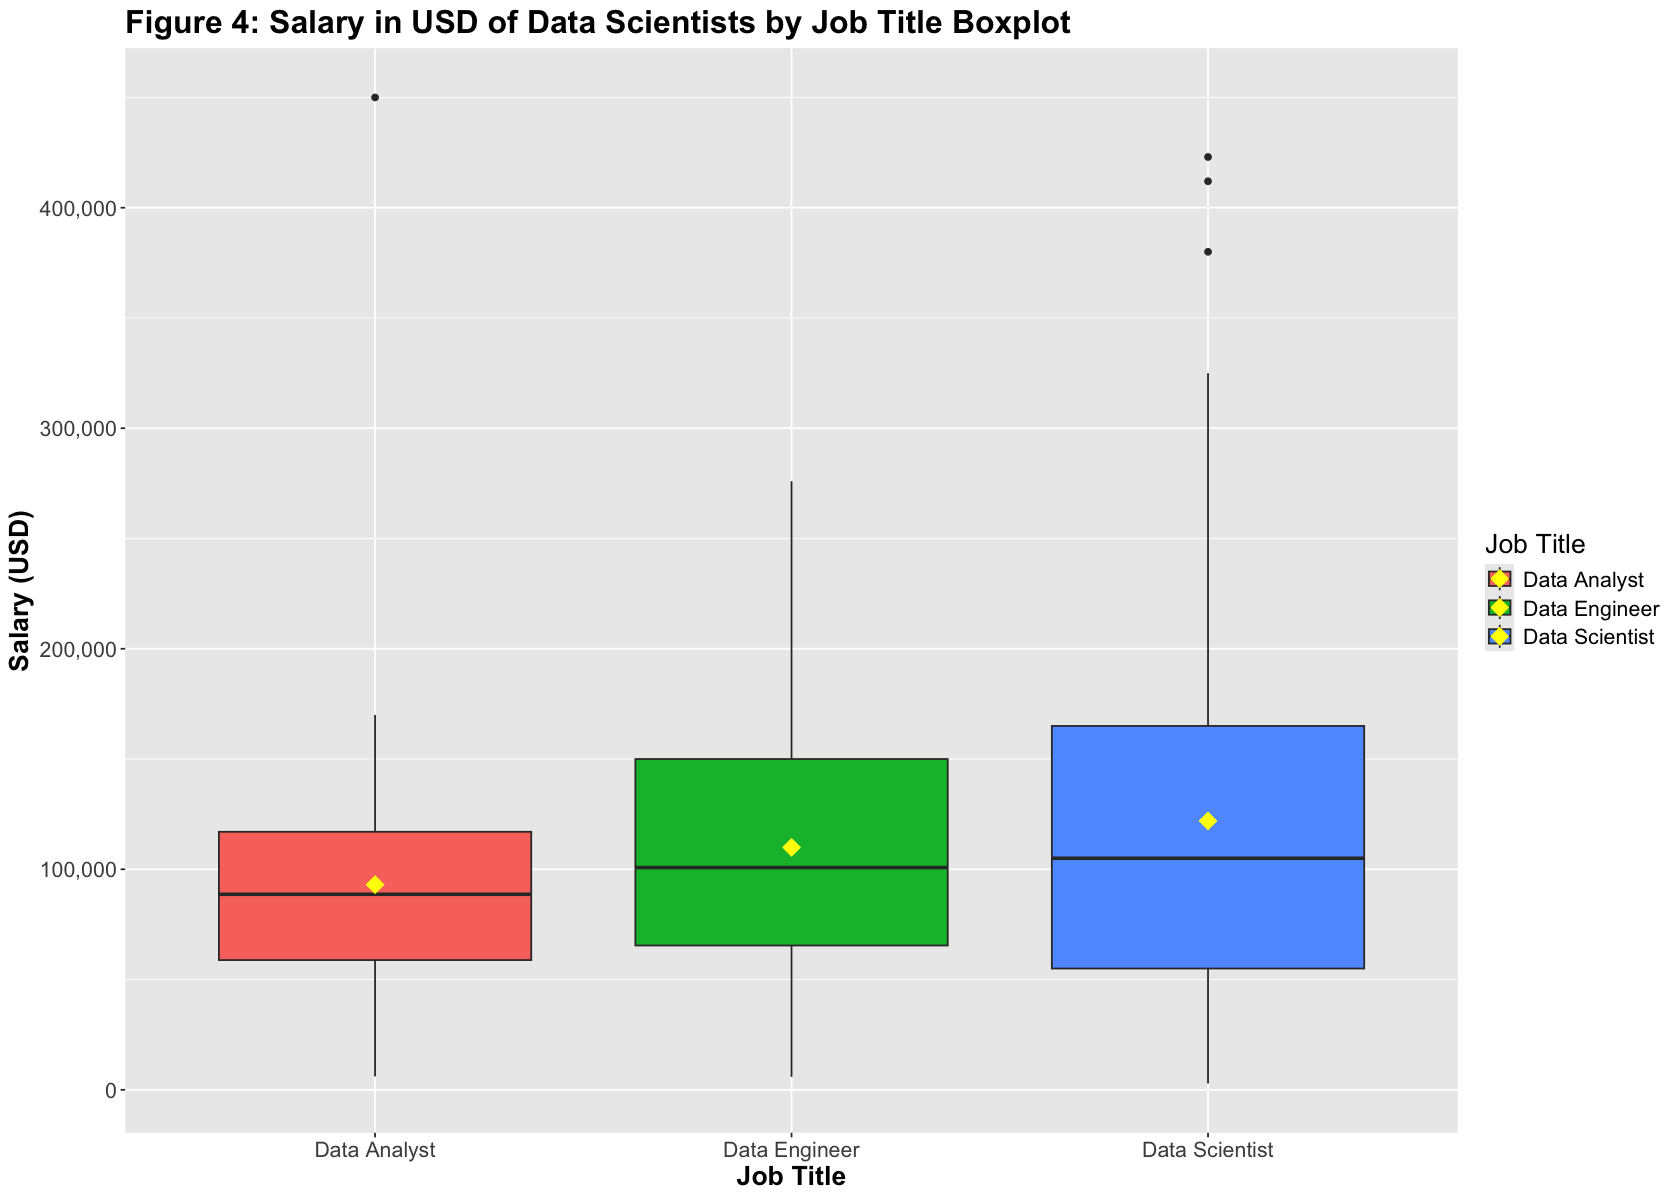

In [19]:
# Main developer: Eric
#Boxplot for salary in USD and job title. A point is added indicating the mean.
salary_in_usd_job_title_boxplots <- tidy_ds_salaries_sel |>
    ggplot() +
    geom_boxplot(aes(x = job_title, y = salary_in_usd, fill = job_title)) +
    labs(x = "Job Title",
         y = "Salary (USD)",
         title = "Figure 4: Salary in USD of Data Scientists by Job Title Boxplot",
         fill = "Job Title") +
    stat_summary(aes(x = job_title, y = salary_in_usd, fill = job_title),
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_y_continuous(labels = label_comma()) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_usd_job_title_boxplots

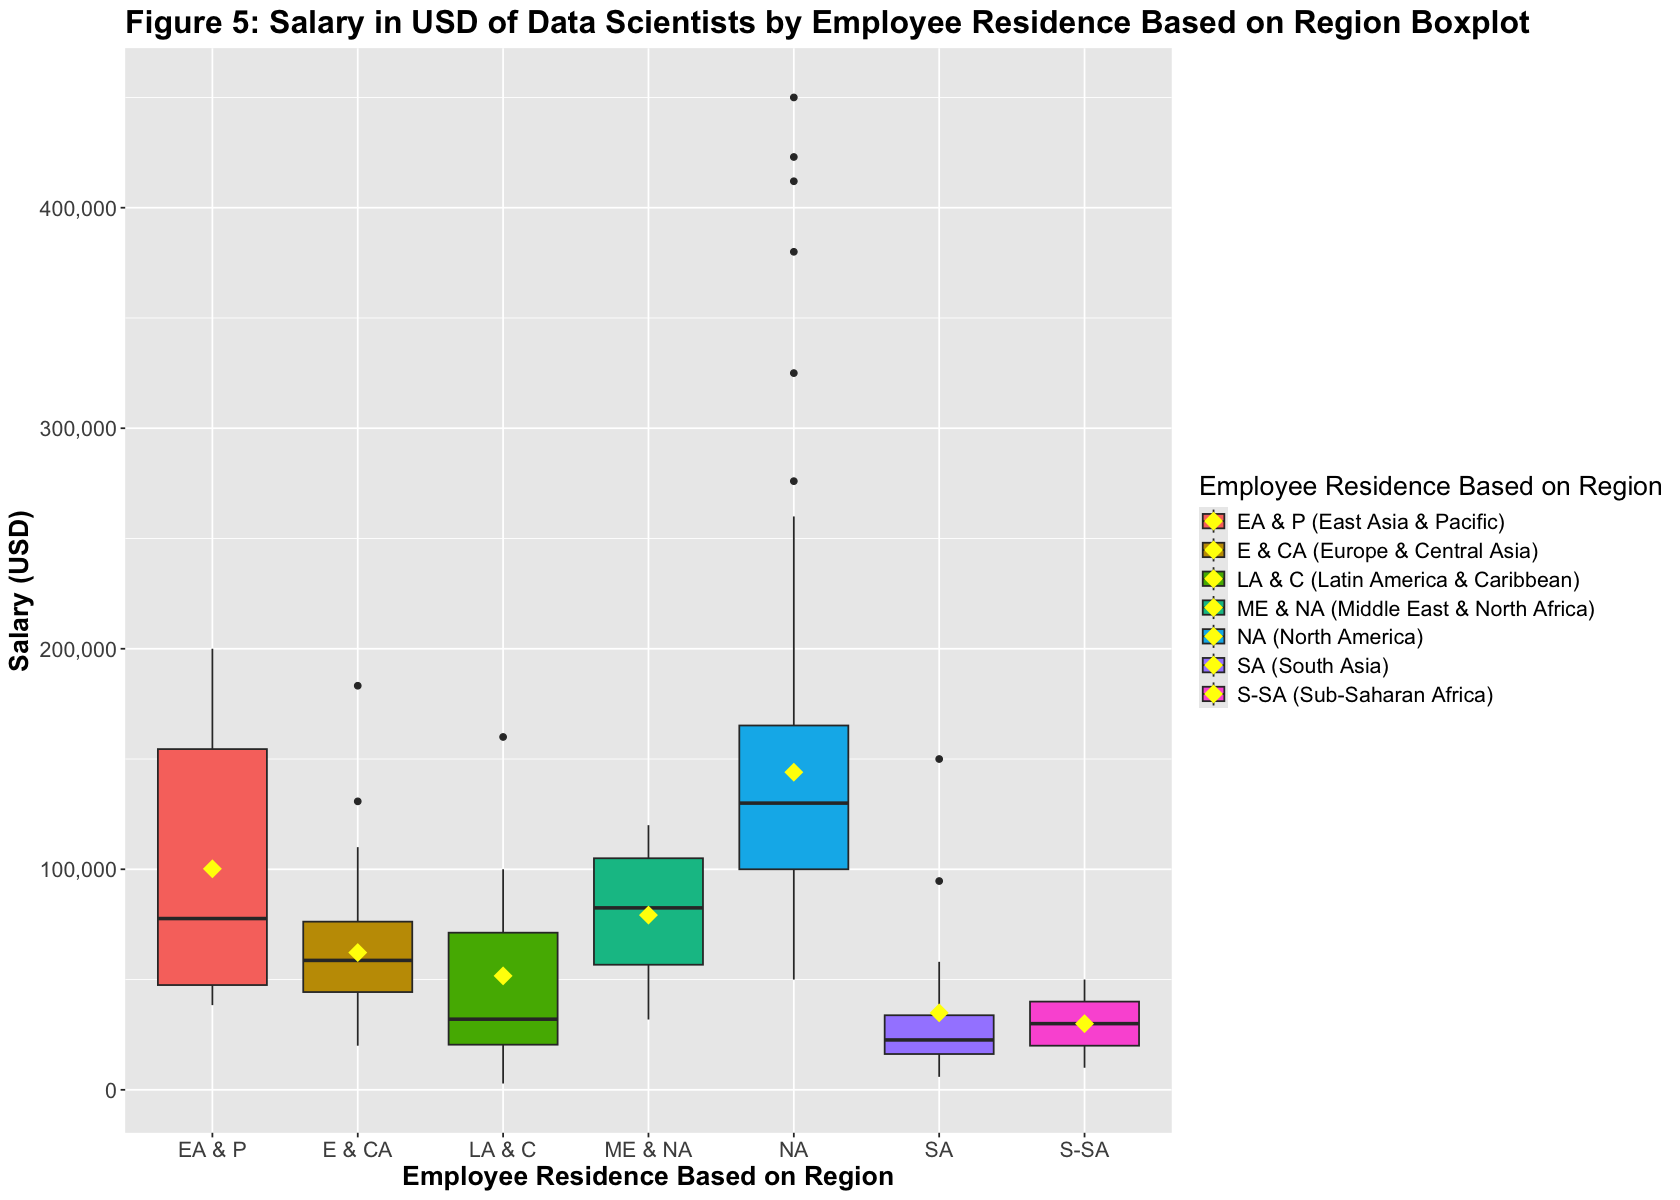

In [20]:
# Main developer: Eric
#Boxplot for salary in USD and employee residence. A point is added indicating the mean.
salary_in_usd_employee_residence_boxplots <- tidy_ds_salaries_sel |>
    ggplot() +
    geom_boxplot(aes(x = employee_residence, y = salary_in_usd, fill = employee_residence)) +
    labs(x = "Employee Residence Based on Region",
         y = "Salary (USD)",
         title = "Figure 5: Salary in USD of Data Scientists by Employee Residence Based on Region Boxplot",
         fill = "Employee Residence Based on Region") +
    stat_summary(aes(x = employee_residence, y = salary_in_usd, fill = employee_residence),
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_x_discrete(labels = c("EA & P", 
                                  "E & CA", 
                                  "LA & C", 
                                  "ME & NA", 
                                  "NA", 
                                  "SA", 
                                  "S-SA")) +
    scale_y_continuous(labels = label_comma()) +
    scale_fill_hue(labels = c("EA & P (East Asia & Pacific)", 
                              "E & CA (Europe & Central Asia)", 
                              "LA & C (Latin America & Caribbean)", 
                              "ME & NA (Middle East & North Africa)", 
                              "NA (North America)", 
                              "SA (South Asia)", 
                              "S-SA (Sub-Saharan Africa)")) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_usd_employee_residence_boxplots

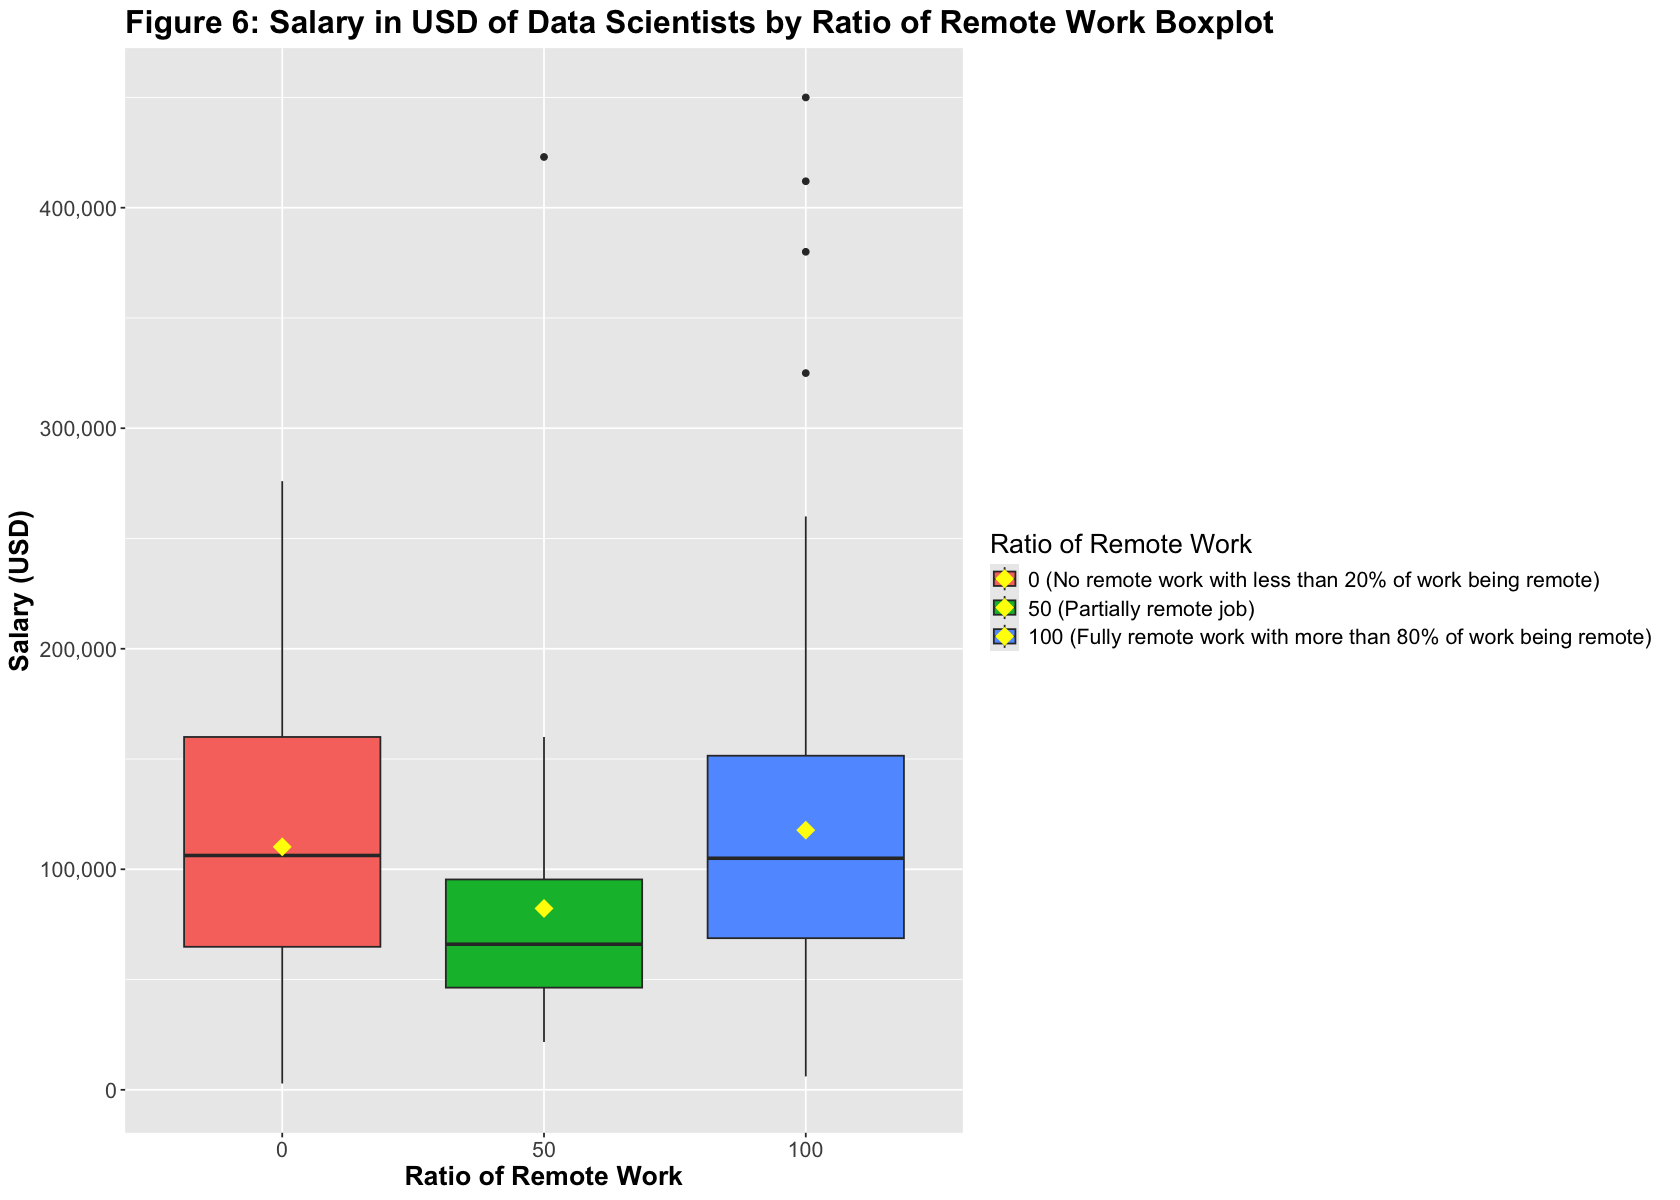

In [21]:
# Main developer: Eric
#Boxplot for salary in USD and the ratio of remote work. A point is added indicating the mean.
salary_in_usd_remote_ratio_boxplots <- tidy_ds_salaries_sel |>
    ggplot() +
    geom_boxplot(aes(x = remote_ratio, y = salary_in_usd, fill = remote_ratio)) +
    labs(x = "Ratio of Remote Work",
         y = "Salary (USD)",
         title = "Figure 6: Salary in USD of Data Scientists by Ratio of Remote Work Boxplot",
         fill = "Ratio of Remote Work") +
    stat_summary(aes(x = remote_ratio, y = salary_in_usd, fill = remote_ratio),
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_y_continuous(labels = label_comma()) +
    scale_fill_hue(labels = c("0 (No remote work with less than 20% of work being remote)",
                              "50 (Partially remote job)",
                              "100 (Fully remote work with more than 80% of work being remote)")) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_usd_remote_ratio_boxplots

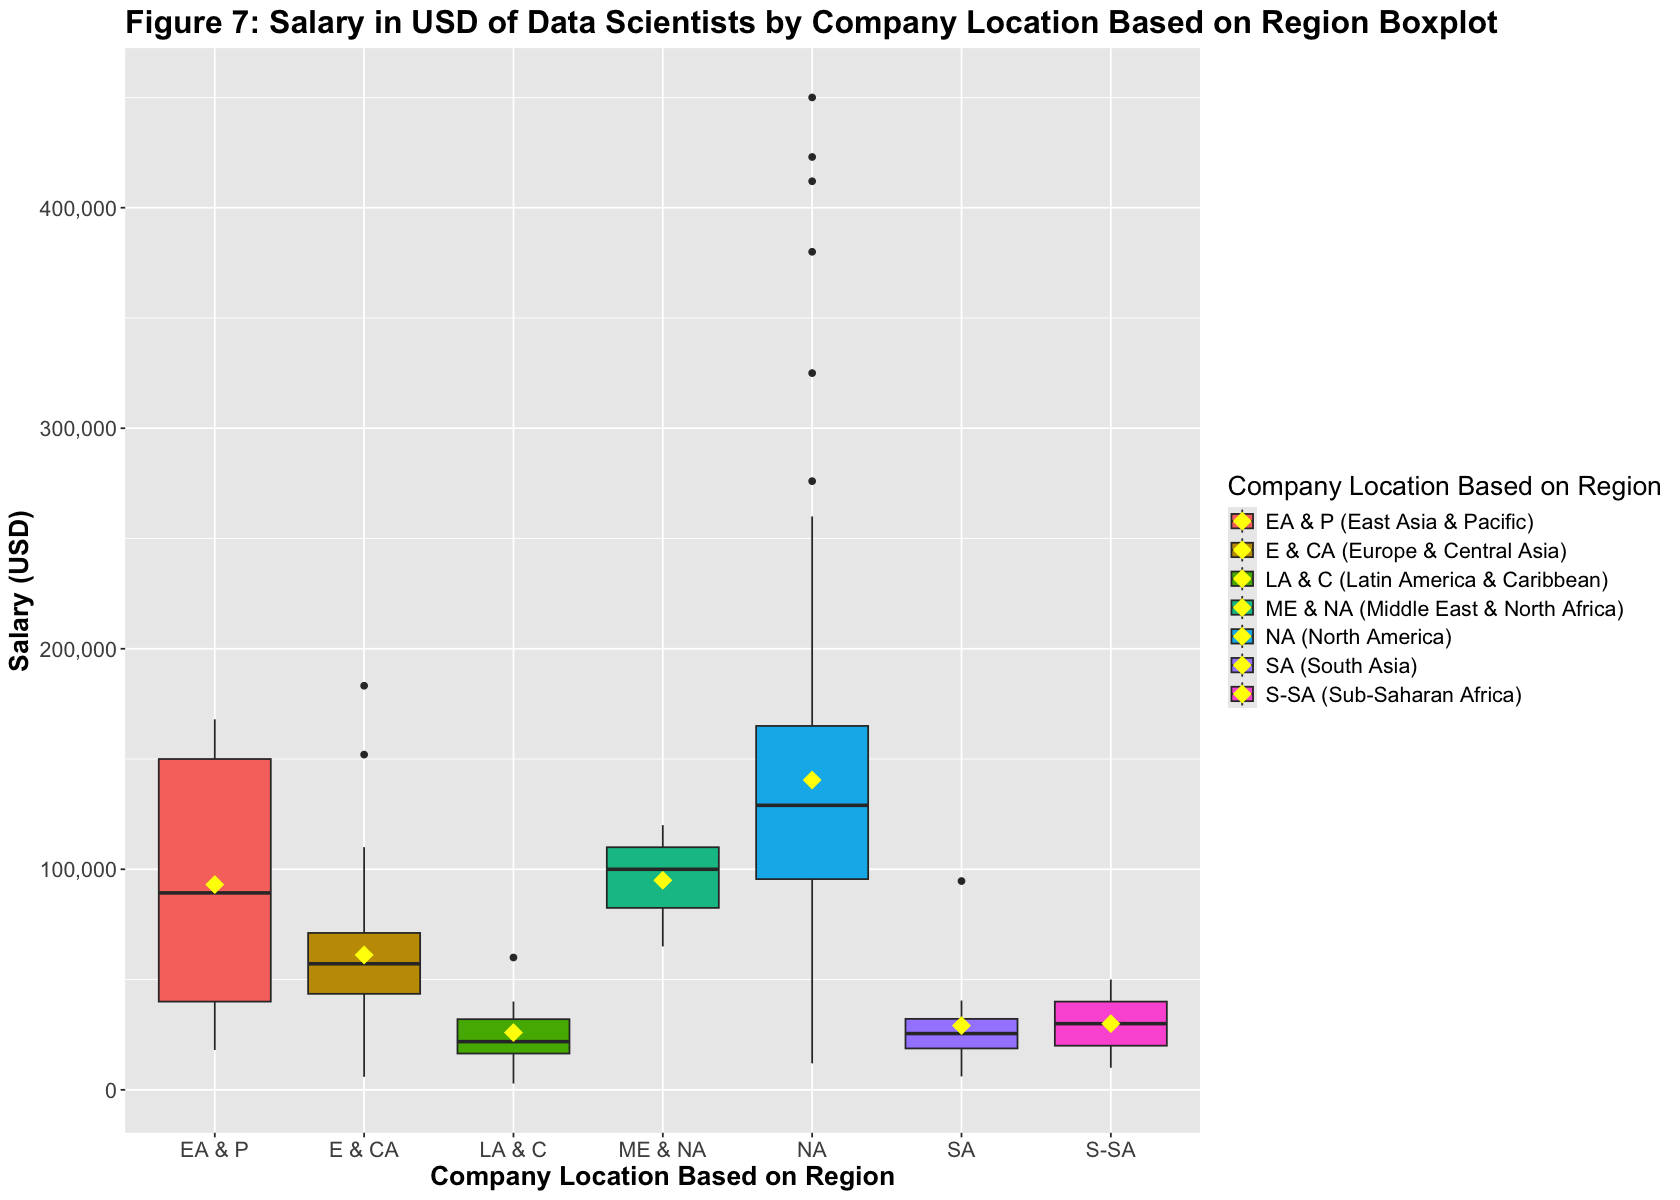

In [22]:
# Main developer: Eric
#Boxplot for salary in USD and company location. A point is added indicating the mean.
salary_in_usd_company_location_boxplots <- tidy_ds_salaries_sel |>
    ggplot() +
    geom_boxplot(aes(x = company_location, y = salary_in_usd, fill = company_location)) +
    labs(x = "Company Location Based on Region",
         y = "Salary (USD)",
         title = "Figure 7: Salary in USD of Data Scientists by Company Location Based on Region Boxplot",
         fill = "Company Location Based on Region") +
    stat_summary(aes(x = company_location, y = salary_in_usd, fill = company_location),
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_x_discrete(labels = c("EA & P", 
                                  "E & CA", 
                                  "LA & C", 
                                  "ME & NA", 
                                  "NA", 
                                  "SA", 
                                  "S-SA")) +
    scale_y_continuous(labels = label_comma()) +
    scale_fill_hue(labels = c("EA & P (East Asia & Pacific)", 
                              "E & CA (Europe & Central Asia)", 
                              "LA & C (Latin America & Caribbean)", 
                              "ME & NA (Middle East & North Africa)", 
                              "NA (North America)", 
                              "SA (South Asia)", 
                              "S-SA (Sub-Saharan Africa)")) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

  

salary_in_usd_company_location_boxplots

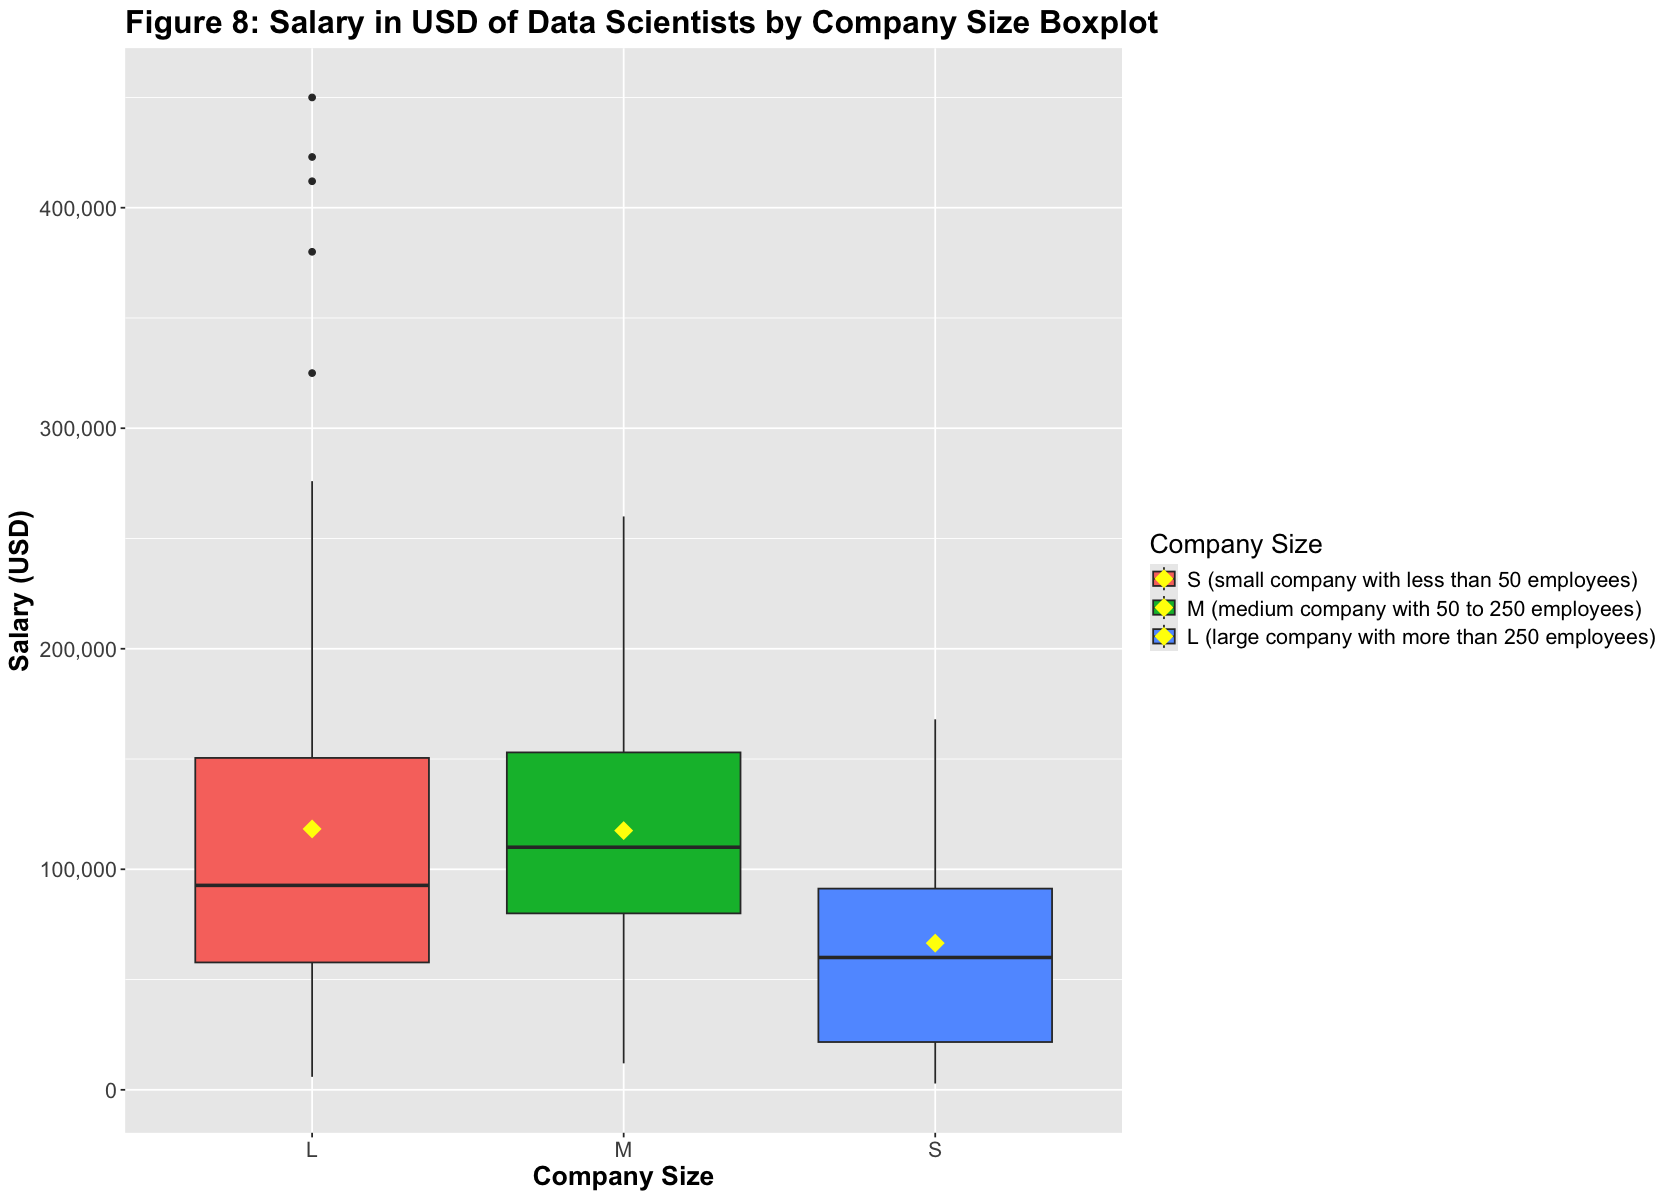

In [23]:
# Main developer: Eric
#Boxplot for salary in USD and company size. A point is added indicating the mean.
salary_in_company_size_boxplots <- tidy_ds_salaries_sel |>
    ggplot() +
    geom_boxplot(aes(x = company_size, y = salary_in_usd, fill = company_size)) +
    labs(x = "Company Size",
         y = "Salary (USD)",
         title = "Figure 8: Salary in USD of Data Scientists by Company Size Boxplot",
         fill = "Company Size") +
    stat_summary(aes(x = company_size, y = salary_in_usd, fill = company_size), 
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_y_continuous(labels = label_comma()) +
    scale_fill_hue(labels = c("S (small company with less than 50 employees)",
                              "M (medium company with 50 to 250 employees)",
                              "L (large company with more than 250 employees)")) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_company_size_boxplots

Based on the visualizations, the variables that had boxplots that appeared to be noticeably different between some or all groups were `experience_level`, `employment_type`, `company_size`, `remote_ratio`, `company_location`, and `employee_residence`. This indicates that it is likely that there is some association between `salary_in_usd` and these variables, so these variables will likely be selected for the model. There is also a similarity between the boxplots of `company_location` and `employee_residence`. This could suggest that these variables might have data that overlaps with each other and can potentially be correlated. This will be further explored in the heatmap below.

`summarise()` has grouped output by 'company_location'. You can override using
the `.groups` argument.


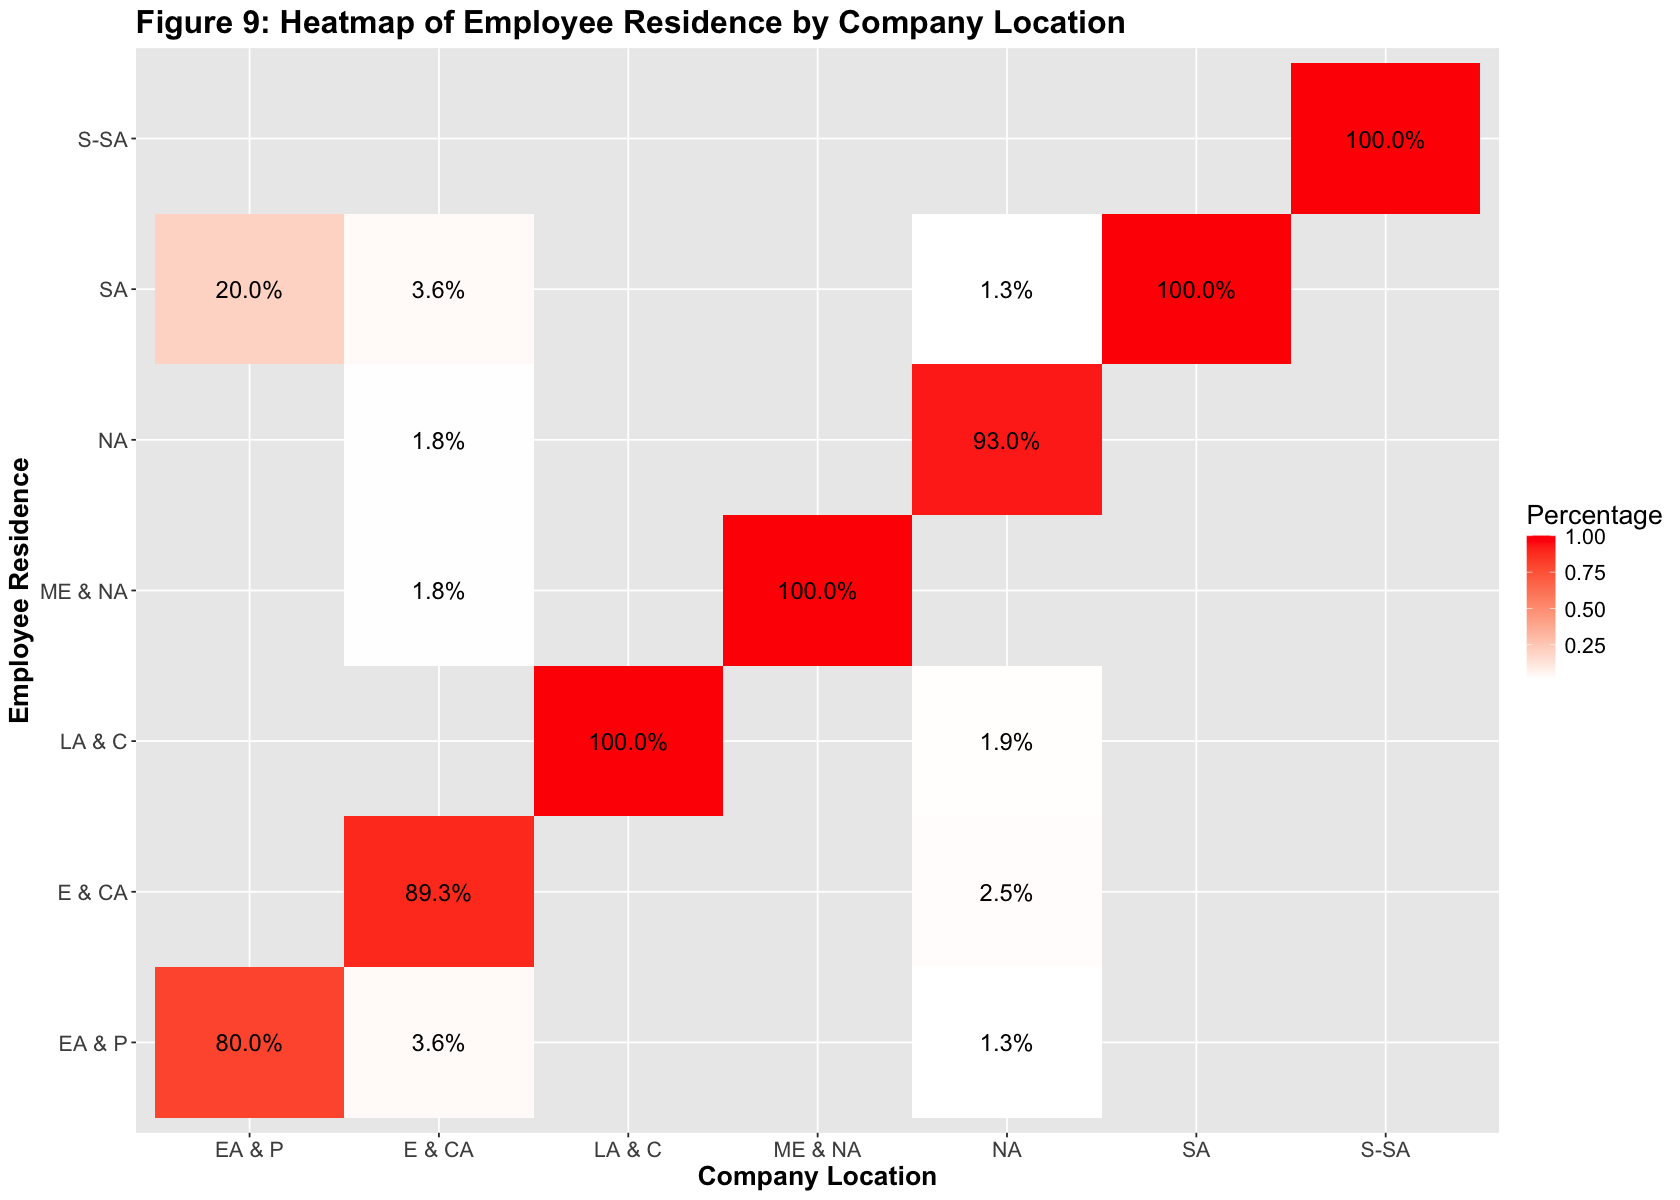

In [24]:
# Main developer: Stevan
# Heatmap for employee residence by company location.
summary_data <- tidy_ds_salaries_sel %>%
    group_by(company_location, employee_residence) %>%
    summarise(count = n()) %>%
    mutate(percentage = count / sum(count))

employee_res_company_loc_heatmap <- ggplot(summary_data,
    aes(x = company_location, y = employee_residence, fill = percentage)) +
    geom_tile() +
    scale_fill_gradient(low = "white", high = "red", name = "Percentage") +
    labs(title = "Figure 9: Heatmap of Employee Residence by Company Location",
         x = "Company Location",
         y = "Employee Residence") +
    scale_x_discrete(labels = c("EA & P", 
                                "E & CA", 
                                "LA & C", 
                                "ME & NA", 
                                "NA", 
                                "SA", 
                                "S-SA")) +
    scale_y_discrete(labels = c("EA & P", 
                                "E & CA", 
                                "LA & C", 
                                "ME & NA", 
                                "NA", 
                                "SA", 
                                "S-SA")) +
    theme(text = element_text(size = 16),
          plot.title = element_text(face = "bold"),
          axis.title = element_text(face = "bold", size = 16)) +
    stat_summary(fun = mean, geom = "text",
                 aes(label = scales::percent(percentage, accuracy = 0.1)),
                 color = "black",
                 size = 5)

employee_res_company_loc_heatmap

It's clear that `company_location` and `employee_residence` are highly correlated and are the same the majority of the time, with most employees residing in the region where they work. We want one of these two variables to be dropped to avoid collinearity, which may result in some loss of information. To account for this, we will encode the interaction between `company_location` and `employee_residence` as a new variable `works_abroad`, which is "Yes" if both locations match and "No" otherwise.

In [25]:
# Main developer: Stevan
# Add works abroad to the dataset.
add_works_abroad <- function(data) {
    data |> mutate(works_abroad = ifelse(employee_residence != company_location, "Yes", "No"))
}
tidy_ds_salaries_train <- add_works_abroad(tidy_ds_salaries_train)
tidy_ds_salaries_sel <- add_works_abroad(tidy_ds_salaries_sel)

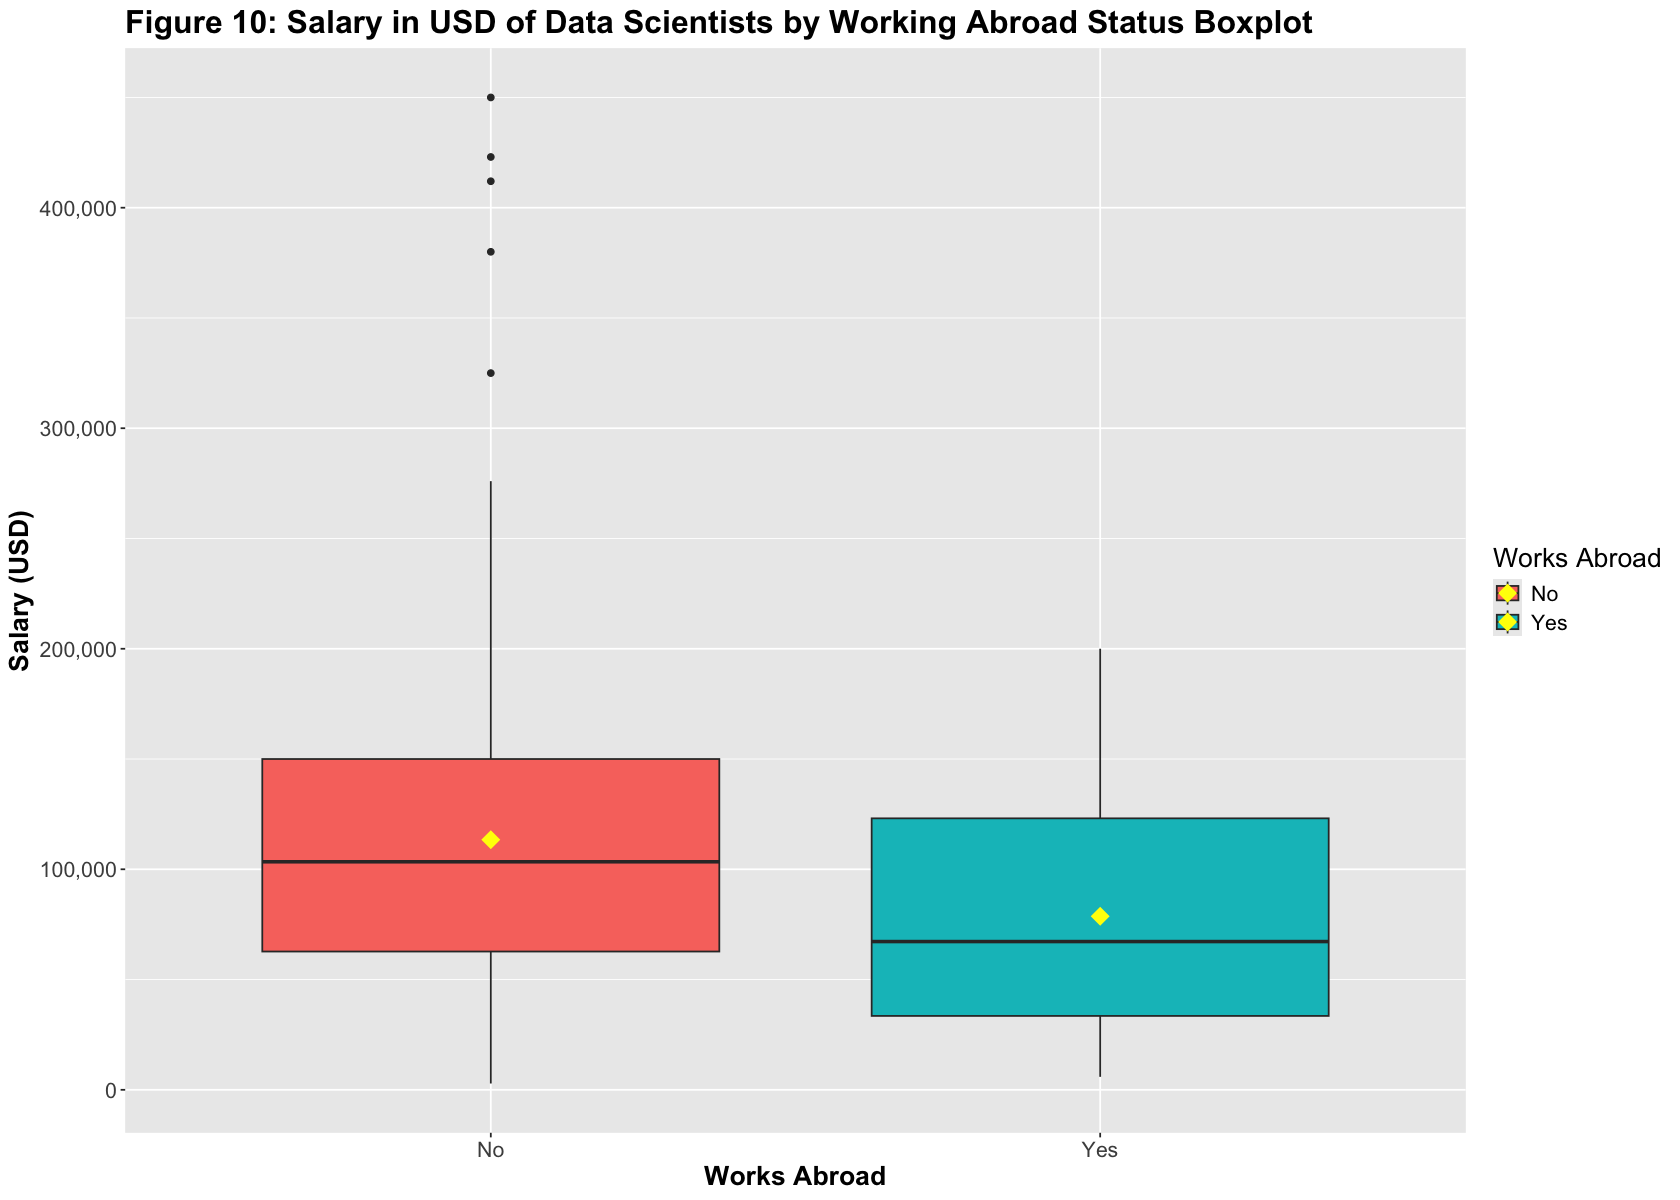

In [26]:
# Main developer: Stevan
# Boxplot for salary in USD and working abroad status. A point is added indicating the mean.
salary_in_company_size_boxplots <- tidy_ds_salaries_sel |>
    ggplot() +
    geom_boxplot(aes(x = works_abroad, y = salary_in_usd, fill = works_abroad)) +
    labs(x = "Works Abroad",
         y = "Salary (USD)",
         title = "Figure 10: Salary in USD of Data Scientists by Working Abroad Status Boxplot",
         fill = "Works Abroad") +
    stat_summary(aes(x = works_abroad, y = salary_in_usd, fill = works_abroad), 
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_y_continuous(labels = label_comma()) +
    scale_fill_hue(labels = c("No", "Yes")) +
    theme(text = element_text(size = 16),
          plot.title = element_text(face = "bold"),
          axis.title = element_text(face = "bold", size = 16))

salary_in_company_size_boxplots

There seems to be some correlation between `works_abroad` and `salary_in_usd`, but not as much as `experience_level`, `employment_type`, `company_size`, `remote_ratio`, `company_location`, and `employee_residence`. Now that the interaction between `company_location` and `employee_residence` has been added, we can drop one of the two variables. In our project, we will remove `company_location`.

In [27]:
# Main developer: Stevan
# Remove company location from the dataset.
remove_company_location <- function(data) {
    data |> select(-company_location)
}
tidy_ds_salaries_train <- remove_company_location(tidy_ds_salaries_train)
tidy_ds_salaries_sel <- remove_company_location(tidy_ds_salaries_sel)

### Summarizing the Data

To complete the exploratory data analysis, we will include the summary data from the selection set for the variables we believe to be correlated.

#### Table 5: Number of Observations in Each Group for Experience Level

In [28]:
# Main developer: Eric
# Summary table for experience level containing counts.
summary_experience_level <- tidy_ds_salaries_sel |>
    group_by(experience_level) |>
    summarize(count = n())
summary_experience_level

experience_level,count
<fct>,<int>
EN,39
EX,7
MI,87
SE,109


#### Table 6: Number of Observations in Each Group for Employment Type

In [29]:
# Main developer: Eric
# Summary table for employment type containing counts.
summary_employment_type <- tidy_ds_salaries_sel |>
    group_by(employment_type) |>
    summarize(count = n())
summary_employment_type

employment_type,count
<fct>,<int>
CT,2
FL,1
FT,234
PT,5


#### Table 7: Number of Observations in Each Group for Company Size

In [30]:
# Main developer: Eric
# Summary table for company size type containing counts.
summary_company_size <- tidy_ds_salaries_sel |>
    group_by(company_size) |>
    summarize(count = n())
summary_company_size

company_size,count
<fct>,<int>
L,80
M,129
S,33


#### Table 8: Number of Observations in Each Group for Remote Ratio

In [31]:
# Main developer: Eric
# Summary table for remote ratio containing counts.
summary_remote_ratio <- tidy_ds_salaries_sel |>
    group_by(remote_ratio) |>
    summarize(count = n())
summary_remote_ratio

remote_ratio,count
<fct>,<int>
0,57
50,35
100,150


#### Table 9: Number of Observations in Each Group for Employee Residence

In [32]:
# Main developer: Eric
# Summary table for employee residence containing counts.
summary_employee_residence <- tidy_ds_salaries_sel |>
    group_by(employee_residence) |>
    summarize(count = n())
summary_employee_residence

employee_residence,count
<fct>,<int>
East Asia & Pacific,8
Europe & Central Asia,54
Latin America & Caribbean,10
Middle East & North Africa,4
North America,147
South Asia,17
Sub-Saharan Africa,2


The counts for some of the groups in the variables above are fairly low. If this is the case in the training set, which is likely, then the smaller groups can suffer from higher standard errors and decreased power in the hypothesis tests.

## Methods: Plan

We will use forward stepwise selection to select the input variables that will be used in the MLR. This process involves starting with an intercept-only model and then adding the best variables at each step according to some scoring metric one by one to the model. The model with the highest scoring metric overall is then selected and determined to be the best model. The metric we have chosen is the adjusted R-squared (adjusted $R^2$), which is based on $R^2$ and is used to compare models with a different number of variables. It is a metric that penalizes more complex models, which is what we want during variable selection so our final model is more understandable.

Since many of our dataset's features are categorical, we will be using the `stepwise` function from the `StepReg` library rather than the `regsubsets` function from the `leaps` library to perform forward selection. This is because `stepwise` will select all values for a particular factor variable or none at all, while `regsubsets` will select different values for a factor variable individually.

#### Figure 11 and 12: Stepwise Forward Selection Results

$forward
$forward$detail

$forward$summary



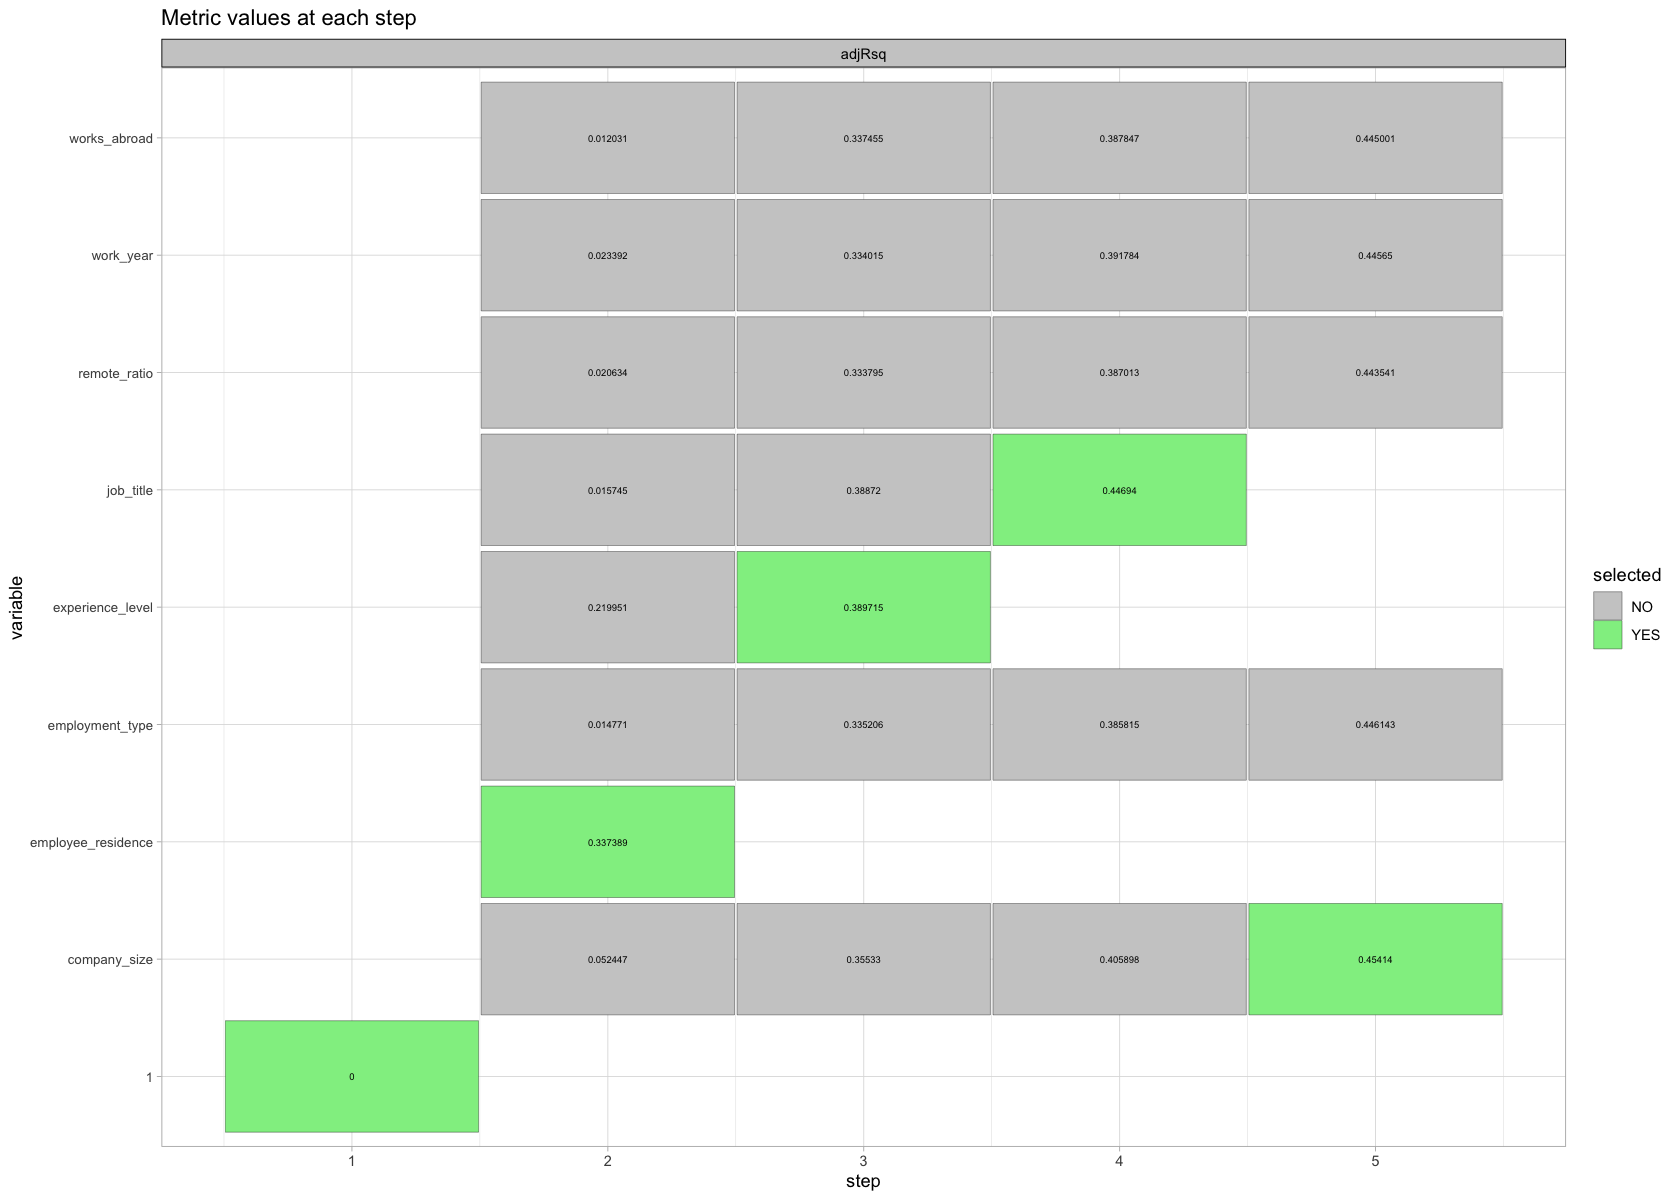

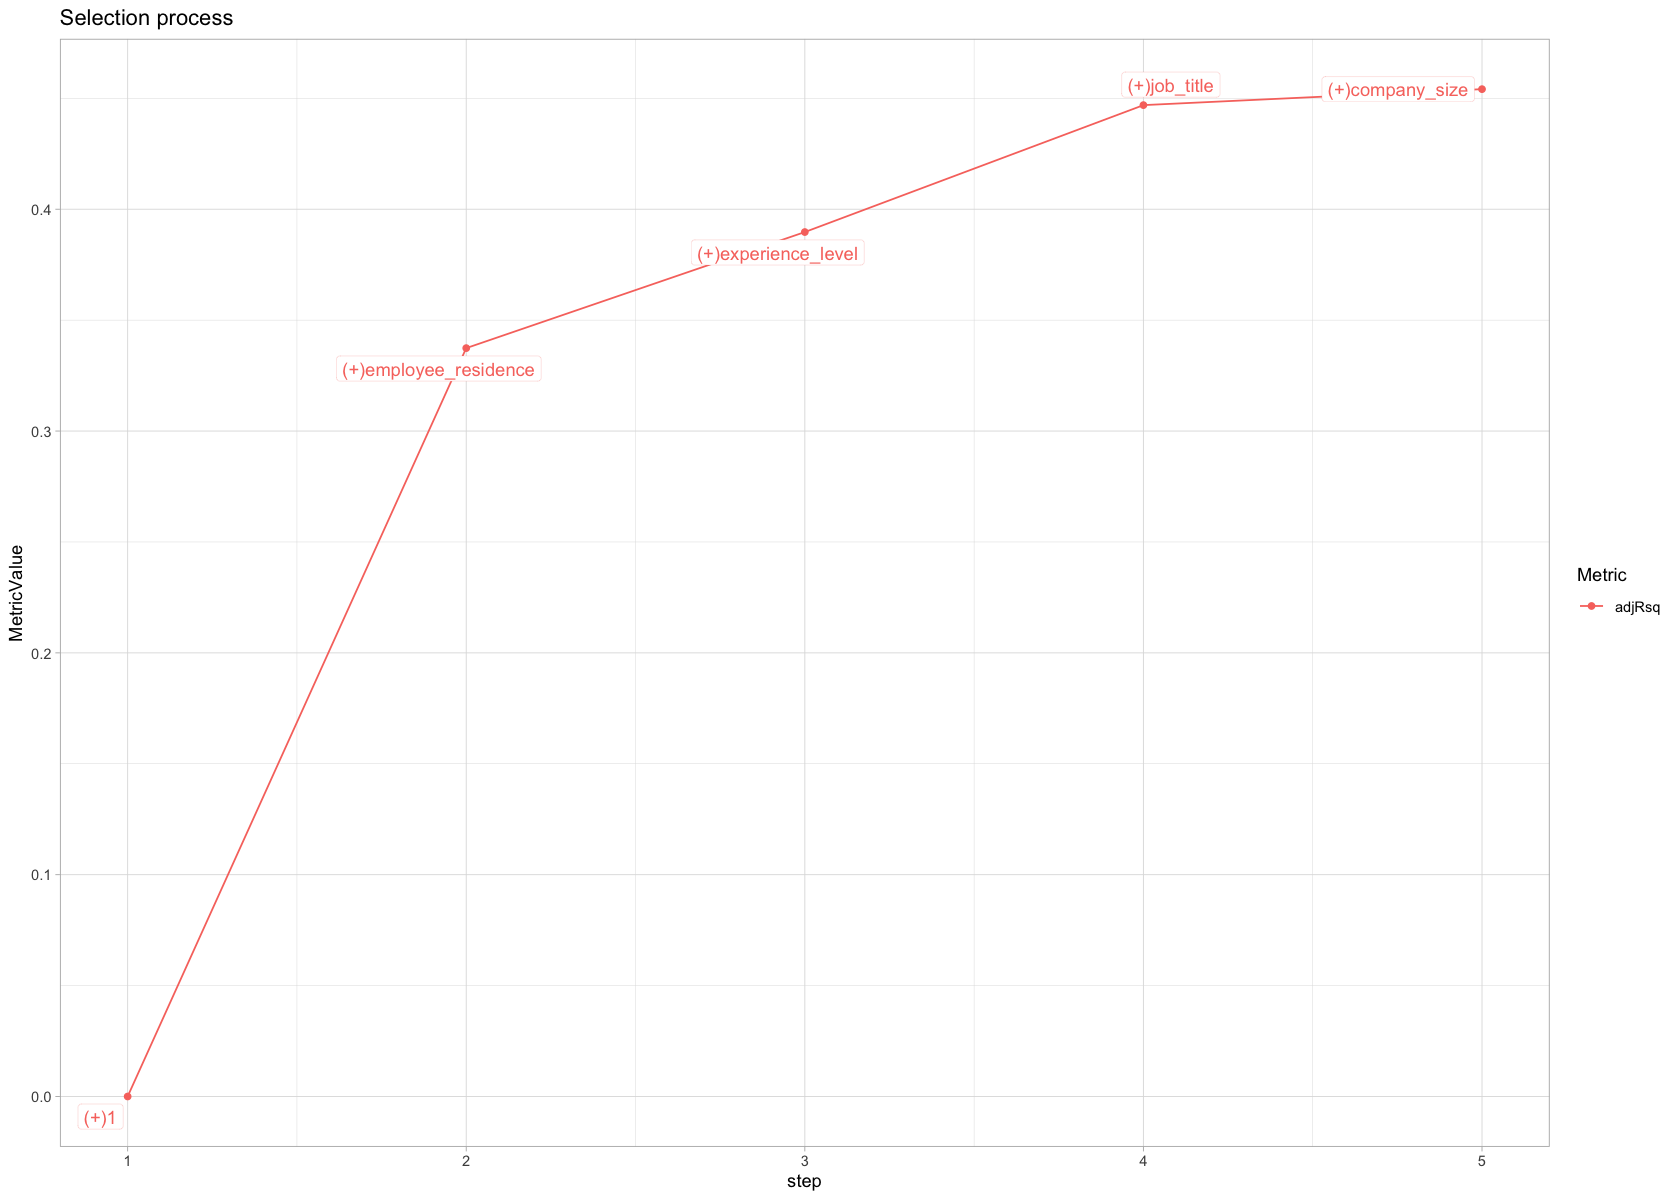

In [33]:
# Main developer: Stevan
# added a comment to code: Anna

# Forward Selection on selection dataset
forward_result <- stepwise(
    salary_in_usd ~ .,
    type = "linear", metric = c("adjRsq"),
    data = tidy_ds_salaries_sel, strategy = "forward"
)

plot(forward_result)

The selected variables from the forward selection process are `employee_residence`, `experience_level`, `job_title`, and `company_size`.

#### Table 10: Tidy Output of Fitted Model Containing Estimates and Statistical Test Results

In [34]:
# Main developer: Anna
# Contributor: Stevan (changed selected variables)
# Fit an additive multiple linear regression model
mlr_model <- lm(
    salary_in_usd ~ employee_residence + experience_level + job_title + company_size,
    data = tidy_ds_salaries_train
)

# Display the summary of the model to see coefficients and statistics
tidy(mlr_model)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),52664.18,18651.005,2.8236645,5.018742e-03
employee_residenceEurope & Central Asia,-26227.76,15845.638,-1.6552038,9.877695e-02
employee_residenceLatin America & Caribbean,-43264.29,29587.659,-1.4622410,1.445699e-01
employee_residenceMiddle East & North Africa,-26912.49,29506.929,-0.9120735,3.623560e-01
employee_residenceNorth America,42787.33,15967.589,2.6796363,7.717473e-03
employee_residenceSouth Asia,-58260.32,19192.365,-3.0355987,2.579886e-03
employee_residenceSub-Saharan Africa,-25720.54,53665.765,-0.4792728,6.320430e-01
experience_levelEX,124134.83,13996.675,8.8688798,3.809288e-17
experience_levelMI,18680.76,8875.868,2.1046691,3.603063e-02


### Coefficient Analysis

To conduct our analysis, we will use a significance level of 0.05. Any $p$-value smaller than this value will be considered significant.

##### Employee Residence:

We can see that employee residence significantly influences salary outcomes. The reference category is the East Asia and Pacific location.

- It appears that North America, and South Asia are statistically significant, while the rest of the regions are not since their p-values are not less than 0.05. Therefore there is a statistically significant difference between salaries accross employee's residence. 

##### Experience Level
Experience level significantly influences salary outcomes, with the entry level serving as the reference category:

- Executive Level (EX): The coefficient estimate is 124134.83, suggesting that, compared to entry-level employees, executive level employees earn about $124134.83 more. This level is statistically significant as the p-value is much smaller than our established significance level of 0.05.

- Mid Level (MI): The coefficient estimate is 18680.76, suggesting that, compared to entry-level employees, mid-level employees earn about $18680.76 more. This level is statistically significant as the p-value is 0.036, which is less than our established significance level of 0.05.

- Senior Level (SE): The coefficient estimate is 44613.93, suggesting that, compared to entry-level employees, senior level employees earn about $44613.93 more. This level is statistically significant as the p-value is much smaller than our established significance level of 0.05.


##### Job Title
Job title significantly influences salary outcomes, the reference group is Data Analyst.

- It appears both the Data Engineer and Data Scientist levels are statistically significant since both their p-values (0.00005 and 0.0002, respectively) are much less than 0.05. Therefore, there is a statistically significant difference between salaries across the job titles. 

##### Company Size
Company size significantly influences salary outcomes; the reference group is the Large company size.

- It appears the Medium level for company size is statistically significant since its p-value of 0.0146 is less than 0.05. 

- The Small level for company size is not statistically significant since its p-value is larger than our significance level of 0.05. 

### Model Fit

#### Table 11: Glance Output of Fitted Model Containing Values Describing Fit

In [35]:
# Main developer: Eric
#Determine values for the model fit.
glance(mlr_model)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.4996948,0.481165,50729.07,26.96706,3.164809e-45,13,-4465.278,8960.555,9019.054,903276823906,351,365


The model has an $R^2$ or coefficient of determination value of 0.4997 on the training set. This means our model explains around 50.0% of the variation of salary in USD for the training data. A coefficient of determination value of 0.4997 is fairly good considering the data at hand, as salaries have many more factors that can influence them that are outside of the scope of our dataset, such as economy, industry, education, skills, and market demand.

#### Verifying Model Assumptions

In our linear model, the assumptions we need to test for are:
  - Linear relationship between response and predictor variables.
  - Errors are independent.
  - Conditional distribution of the error terms is Normal.
  - Equal variance of the error terms.
  - Multicollinearity.

`geom_smooth()` using formula = 'y ~ x'


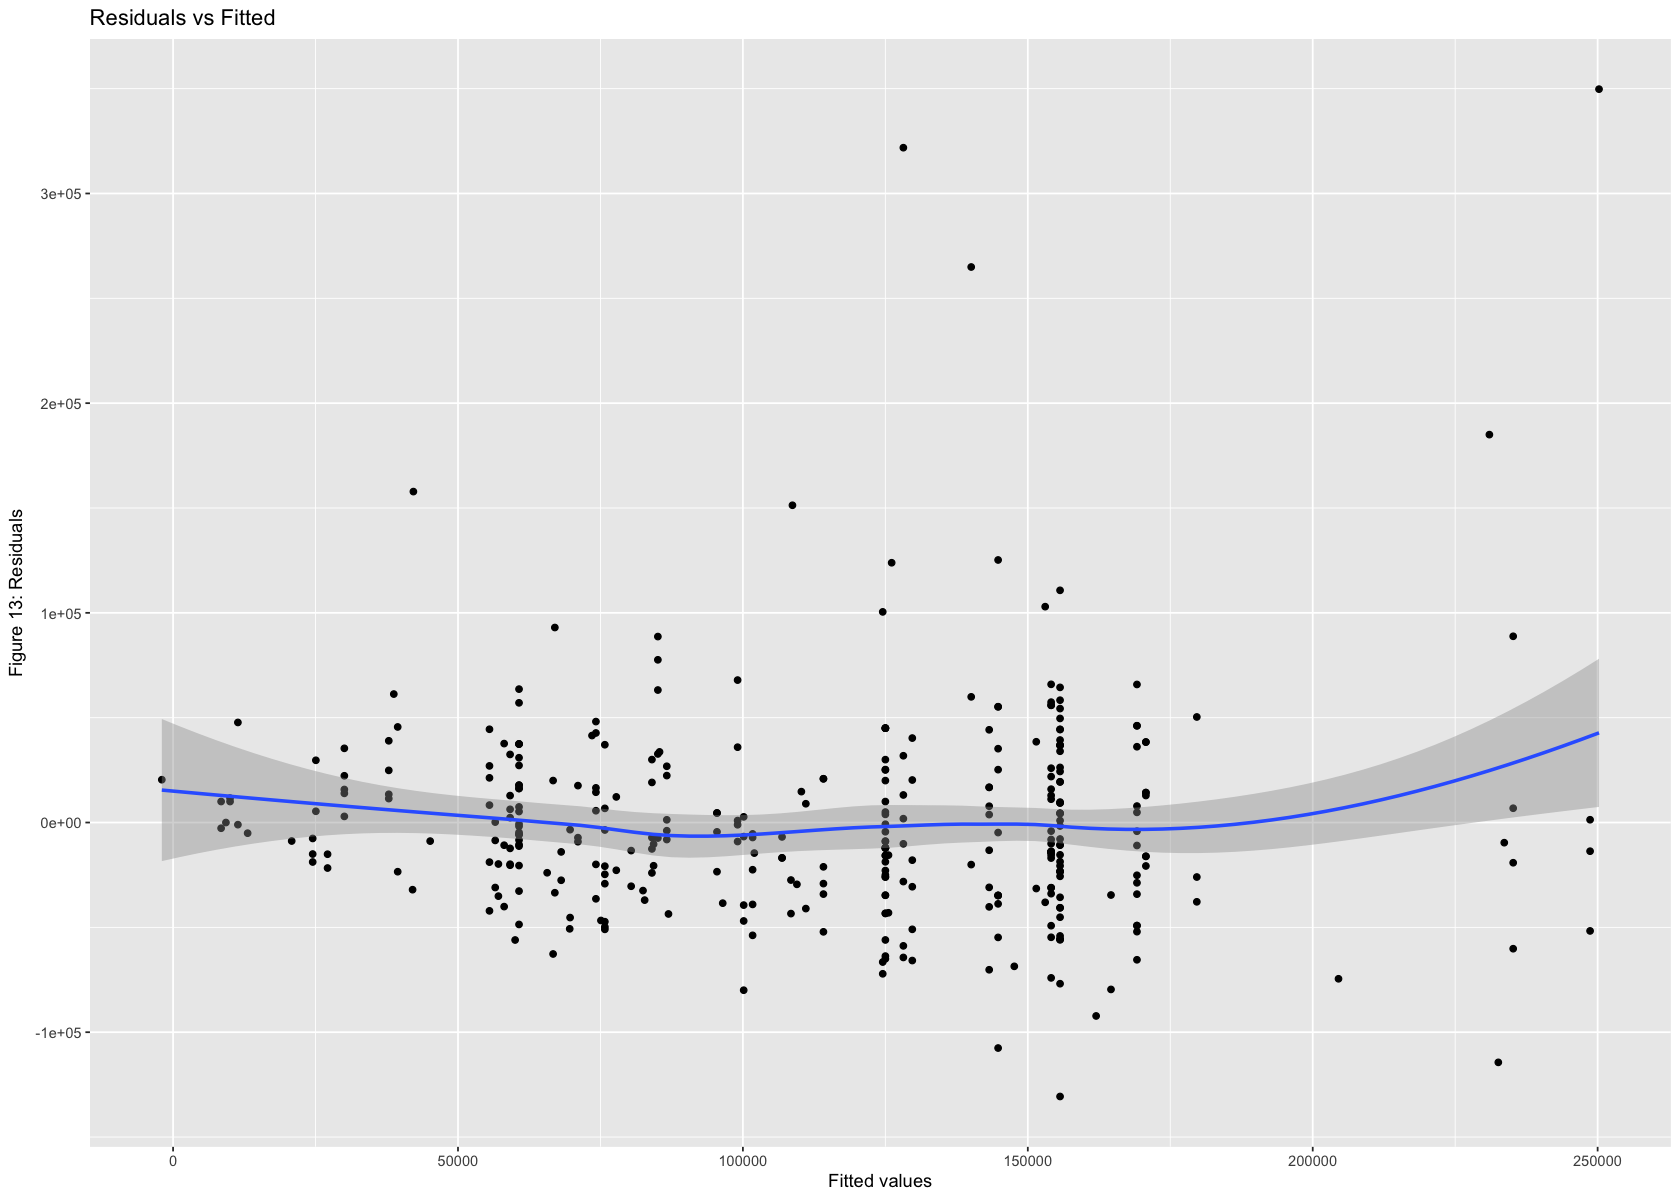

In [36]:
# Main developer: Stevan
# Linearity and heteroscedasticity: Residual plot
ggplot(mlr_model, aes(.fitted, .resid)) +
  geom_point() +
  geom_smooth(method = "loess") +
  labs(title = "Residuals vs Fitted", x = "Fitted values", y = "Figure 13: Residuals")

[1]  23 156

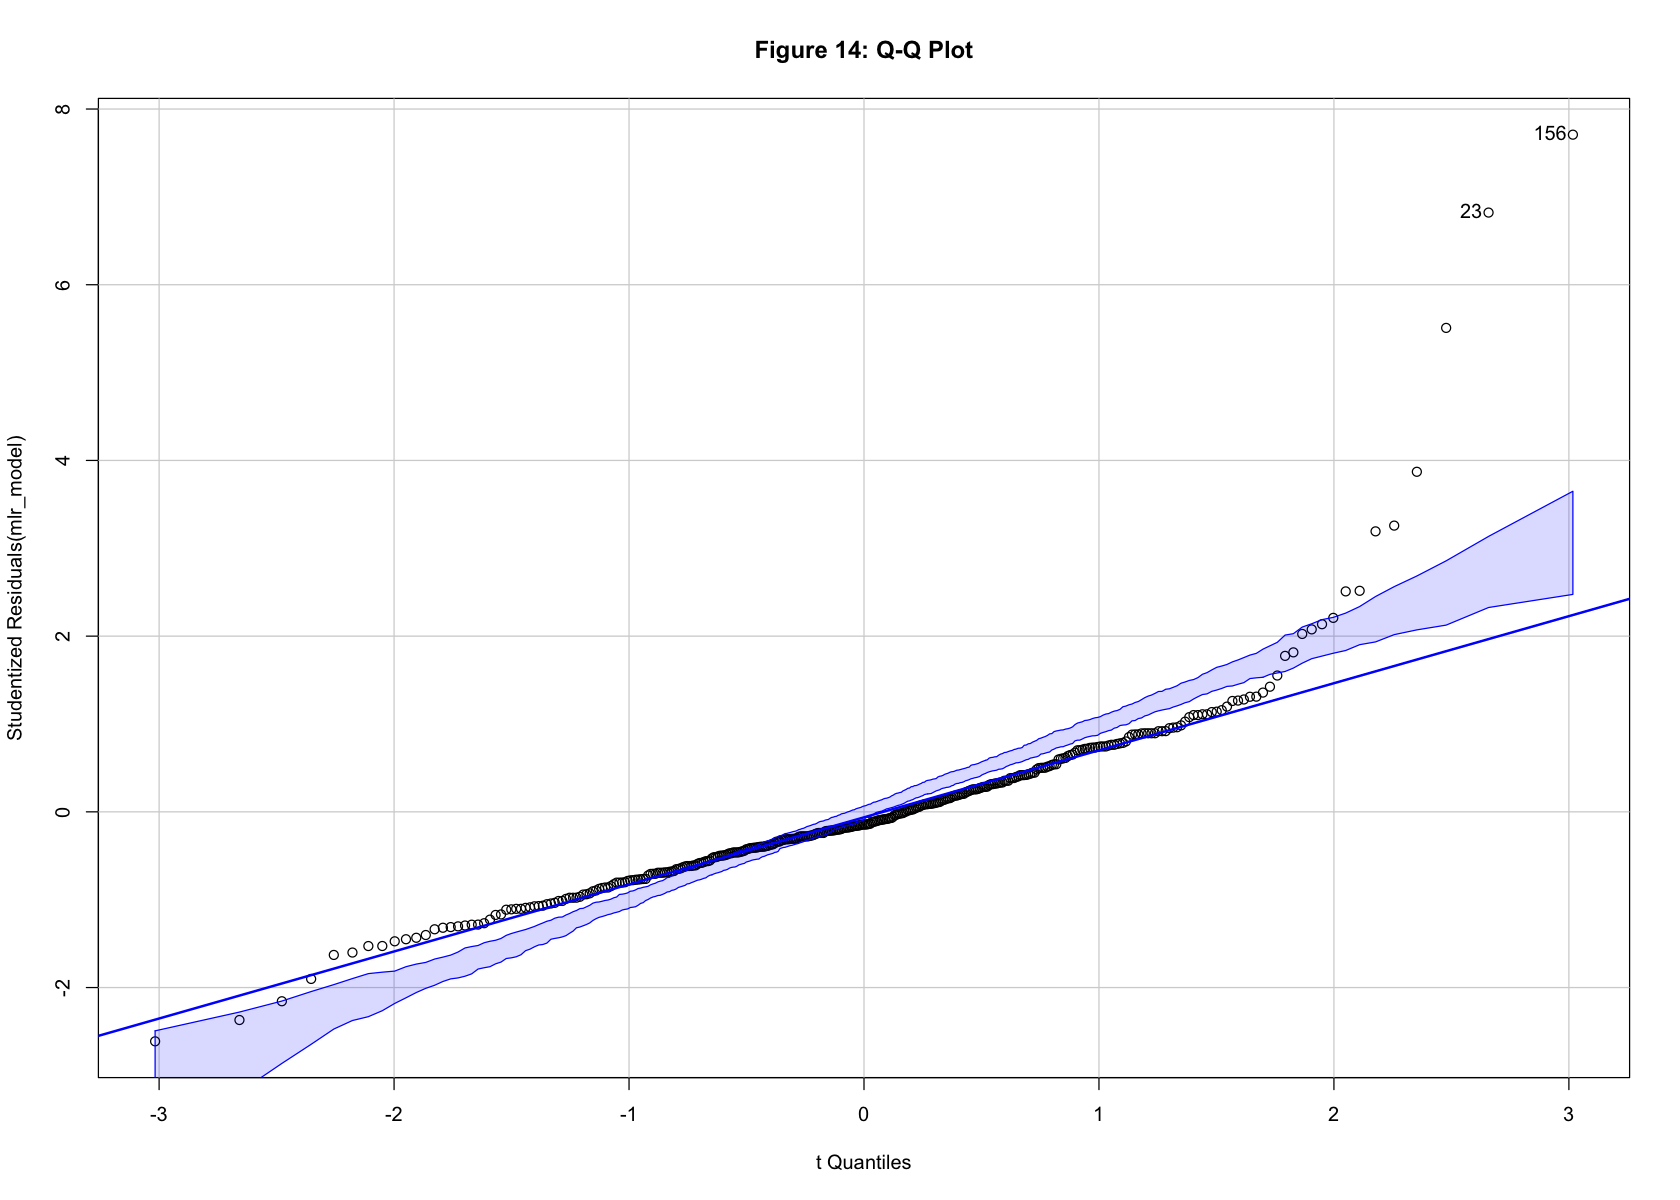

In [37]:
# Main developer: Stevan
# Normality of residuals: Q-Q plot
qqPlot(mlr_model, main = "Figure 14: Q-Q Plot")

#### Table 12: VIF Values for the Fitted Model

In [38]:
# Main developer: Stevan
# Multicollinearity: Variance Inflation Factor (VIF)
vif(mlr_model)

,GVIF,Df,GVIF^(1/(2*Df))
employee_residence,1.500664,6,1.034404
experience_level,1.361749,3,1.052809
job_title,1.152846,2,1.036198
company_size,1.310870,2,1.070015


The linear assumption would be difficult to show visually; however, the linear model does work on categorical variables and acts like a two-sample t-test, so the assumption can be fulfilled. The independent error assumption also seems to be satisfied based on the residuals vs. fitted plot, as there is no clear correlation between data points. The assumption that the conditional distribution of error terms is Normal can be a concern as the Q-Q plot shows points deviating from the diagonal near the end of the graph, which may affect the sampling distribution and standard errors. However, since we have 607 observations, the sample size is large enough that CLT provides a Normal approximation for the sampling distribution. There could be some heteroscedasticity as some areas of the residual vs. fitted plot have a larger residual variance than others, but there is no significant pattern or large difference in the variance of residuals, so the equal variance of the error terms assumption is fine. The GVIF and adjusted GVIF values indicate no significant collinearity, as all GVIF values are below 5 and adjusted GVIF values are below 5^(1/(2*Df)), so the multicollinearity assumption is satisfied.

## Discussion

Our regression analysis indicates that `experience_level` is associated with salary in the data science field, with senior and executive roles earning more. `company_size` and `job_title` are also associated with salary, with larger organizations and certain titles like data scientists and data engineers earning higher salaries. Although it is important to note that the salaries of small companies were found to not be significantly lower than salaries of large companies. `employee_residence` is also significantly associated with salary, likely due to differences in economies and regional market conditions. These findings address our research question by identifying characteristics associated with a data scientist's salary in USD.

We anticipated that `experience_level`, `employment_type`, `company_size`, `remote_ratio`, and `employee_residence` would be associated with salary. Our findings confirmed the significance of `experience_level`, `company_size`, and `employee_residence`, but not `employment_type` and `remote_ratio`. Unexpectedly, `job_title` was significant variable in the model. We do observe some variations in the magnitude of their effects, particularly across different job titles and geographical regions. This suggests that while our initial assumptions about variables such as `employee_residence` were correct, the influence of location might be more complex than initially thought.

To improve our model, we could collect more data, especially for groups with few observations, to reduce standard errors and increase analysis power. Exploring interactive models could improve fit and provide additional insights. A limitation of our dataset is that it primarily consists of categorical variables, which restricts the exploration of more advanced models like LASSO for feature selection. Future studies could benefit from datasets that include continuous variables, such as specific salary components or detailed regional economic indicators, allowing for a more comprehensive analysis.

Several future research questions arise from this study. Future research could explore job titles in more detail to see if specific titles consistently lead to higher salaries across industries or regions. Expanding the geographical scope could reveal regional salary influences, and analyzing data from individual countries like India or Germany might show specific economic contexts. Additionally, investigating emerging roles in data science could provide insights into evolving salary dynamics as the industry grows.

### References




Agoeng, C., Miza Azmi, N. D. F., Mat Harun, H., Abdullah, N., Mustafa, W. A., & Ridzuan, F. (2024). Leveraging correlation and clustering: An exploration of data scientist salaries. Journal of Advanced Research in Computing and Applications, 35(1), 10–20. https://doi.org/10.37934/arca.35.1.1020 

Anderson, H. B. (2018, August 15). What data scientists really do, according to 35 data scientists. Harvard Business Review. https://hbr.org/2018/08/what-data-scientists-really-do-according-to-35-data-scientists

Davenport, T. H. (2022, July 15). Is data scientist still the sexiest job of the 21st century? Harvard Business Review. https://hbr.org/2022/07/is-data-scientist-still-the-sexiest-job-of-the-21st-century